In [1]:
%%html
<link rel="stylesheet" type="text/css" href="rise.css" />

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')

plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.labelsize'] = 14

/var/folders/cq/0x3wj8sx1_dbbm61zp0zqbmm0000gn/T/ipykernel_47606/1955453849.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Linear regression

**Learning goals**
- You will be able to fit a line to X vs. Y data.
- You will be able to fit a hypersurface to {X0, X1, ..., XN} vs. Y data.
- You will appreciate why high leverage data points can greatly influence your fit.
- You will understand how to compute confidence intervals for your model parameters.
- You will be able to visualize the confidence envelope for a X vs. Y linear model.
- You will understand when you should standardize your features.

In [3]:
df = pd.read_csv("data/Data_Cortex_Nuclear.csv")
df

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[1080 rows x 82 columns]

Examine the relation between two protein expression levels across subjects. i.e., how pBRAF expression depends on pAKT expression.

$pBRAF = f(pAKT)$

$f=\ ?$

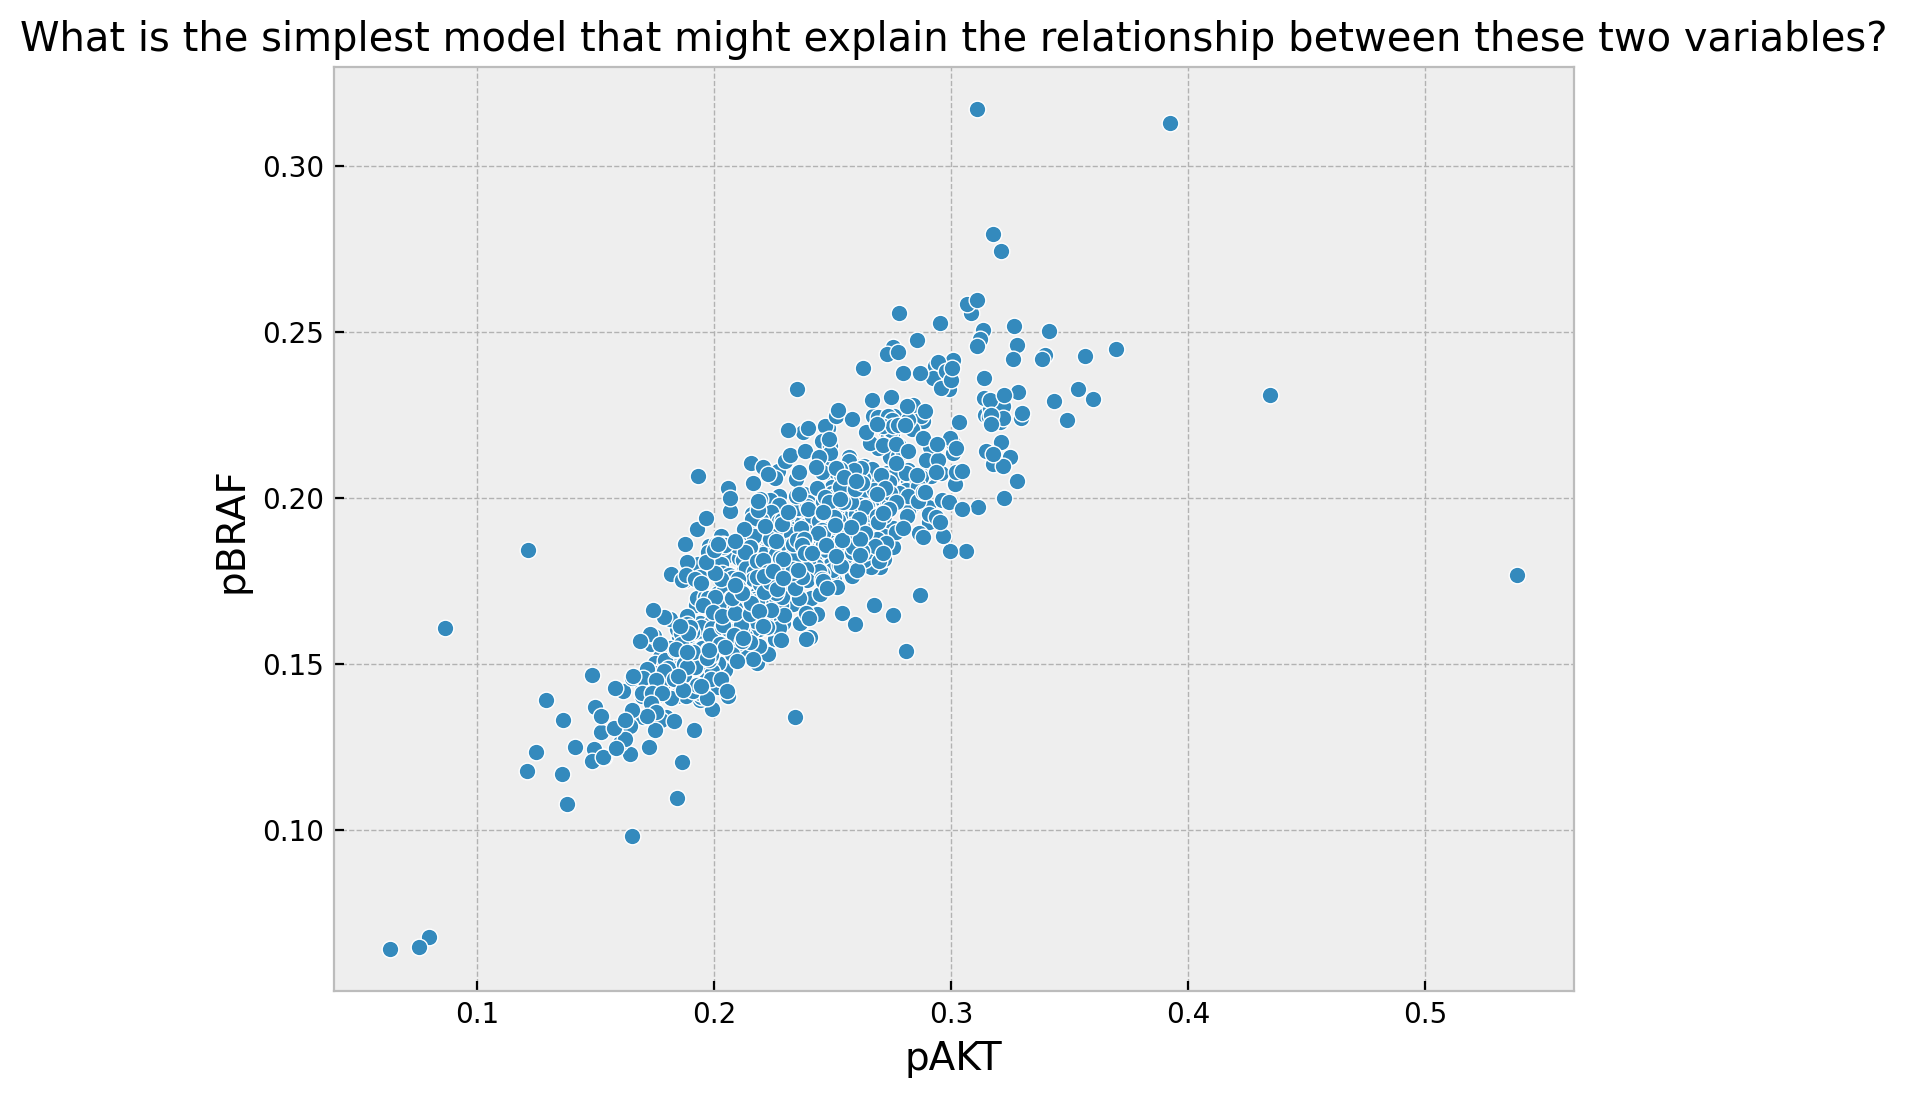

In [4]:
plt.plot(df.pAKT_N, df.pBRAF_N, 'o')
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.title('What is the simplest model that might explain the relationship between these two variables?');

How about a line?

$y = b + m \ x$

$pBRAF = intercept + slope * pAKT$

What's so great about a line?

* Simple
* Easy to interpret
    * $1$ unit change in pAKT $\rightarrow slope$ units change in pBRAF

In [5]:
df = pd.read_csv("data/Data_Cortex_Nuclear.csv")
df

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[1080 rows x 82 columns]

In [6]:
# (x, y) data
df2 = df[['pAKT_N', 'pBRAF_N']]
df2 = df2.dropna()  # get rid of any rows missing data

x = df2.pAKT_N.to_numpy()
y = df2.pBRAF_N.to_numpy()

x.shape, y.shape

((1077,), (1077,))

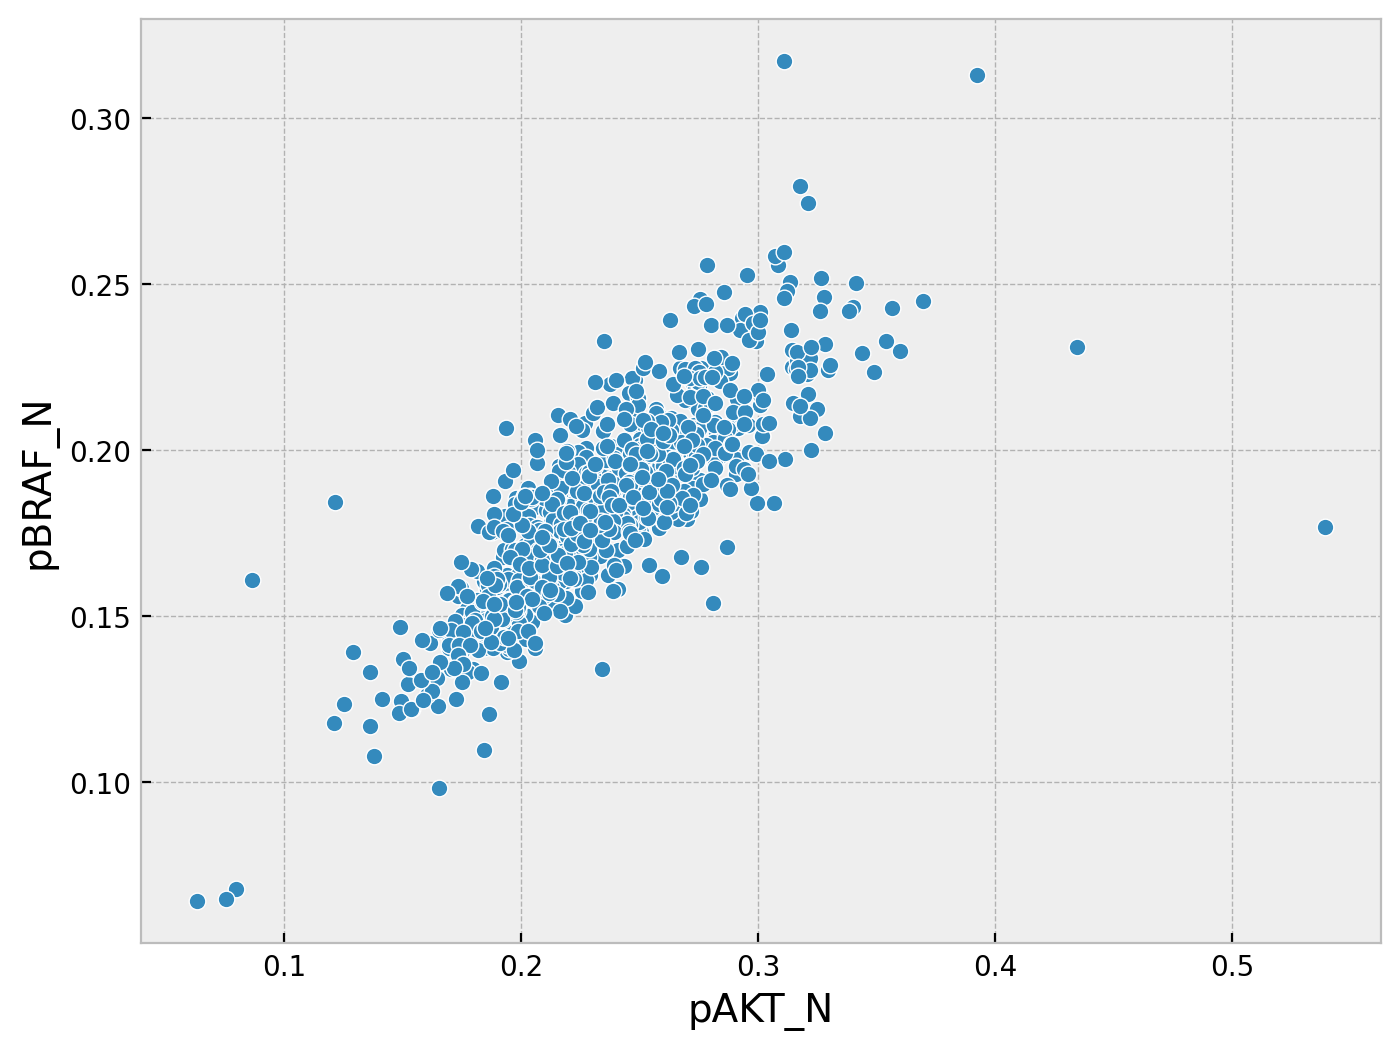

In [7]:
plt.plot(x, y, 'o')
plt.xlabel('pAKT_N')
plt.ylabel('pBRAF_N');

```shell
pip install hvplot
```

In [8]:
import hvplot.pandas

In [9]:
df2.hvplot.scatter(x='pAKT_N', y='pBRAF_N')

:Scatter   [pAKT_N]   (pBRAF_N)

```shell
pip install seaborn
```

In [10]:
import seaborn as sns

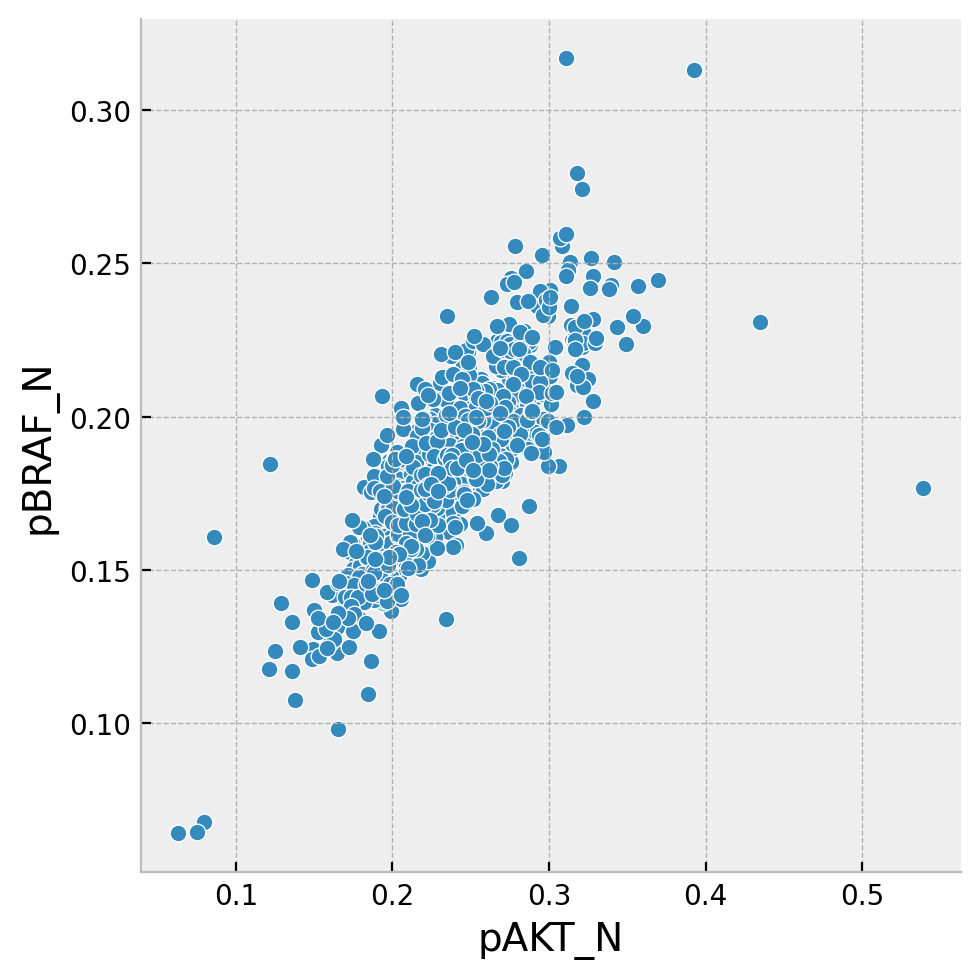

In [11]:
sns.relplot(data=df, x='pAKT_N', y='pBRAF_N');

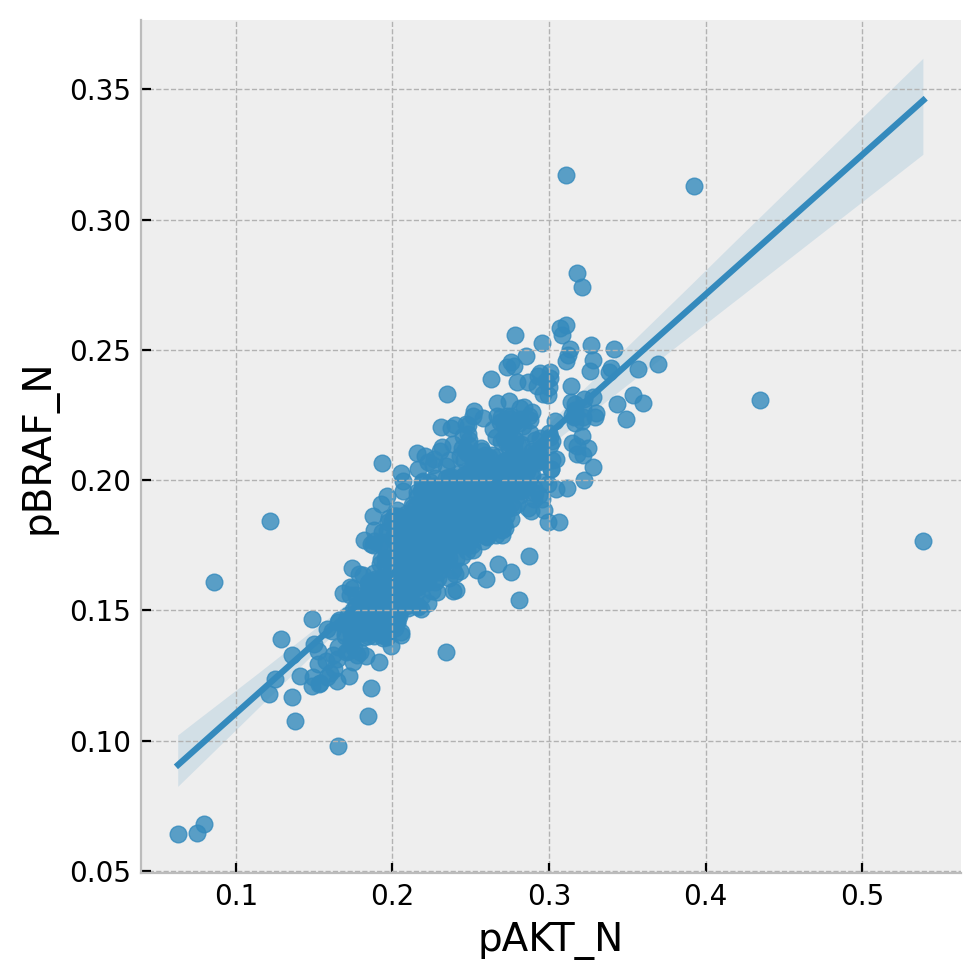

In [12]:
sns.lmplot(data=df, x='pAKT_N', y='pBRAF_N');

# scikit-learn

```shell
pip install scikit-learn
```

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# (x, y) data
df2 = df[['pAKT_N', 'pBRAF_N']]
df2 = df2.dropna()  # get rid of any rows missing data

x = df2.pAKT_N.to_numpy()
y = df2.pBRAF_N.to_numpy()

x.shape, y.shape

((1077,), (1077,))

Prepare the $(x, y)$ data.

$x$ **MUST** be a column vector of size *$N \times 1$*

$y$ is a one-dimensional array of length *$N$*

In [15]:
# X must be a column vector!
x = x.reshape([-1,1])

x.shape

(1077, 1)

Fit the data to a linear model:

$\hat{y} = \beta_0 + \beta_1 x$

In [16]:
# Step 1: Create a model object
model = LinearRegression()

# Step 2: Fit the model to the data
model.fit(x, y)

# Print fit parameters
print(model.intercept_)  # y-intercept
print(model.coef_)  # slope

0.056882766204537485
[0.53593816]


Predict the pBRAF expression level in four cells that have pAKT expression levels of 0.1, 0.2, 0.3 and 0.4, respectively.

$\hat{y} = \beta_0 + \beta_1 x$

In [17]:
new_x_values = np.array([0.1, 0.2, 0.3, 0.4]).reshape([-1,1])  # column vector

new_x_values

array([[0.1],
       [0.2],
       [0.3],
       [0.4]])

In [18]:
predicted_y_values = model.predict(new_x_values)

predicted_y_values

array([0.11047658, 0.1640704 , 0.21766421, 0.27125803])

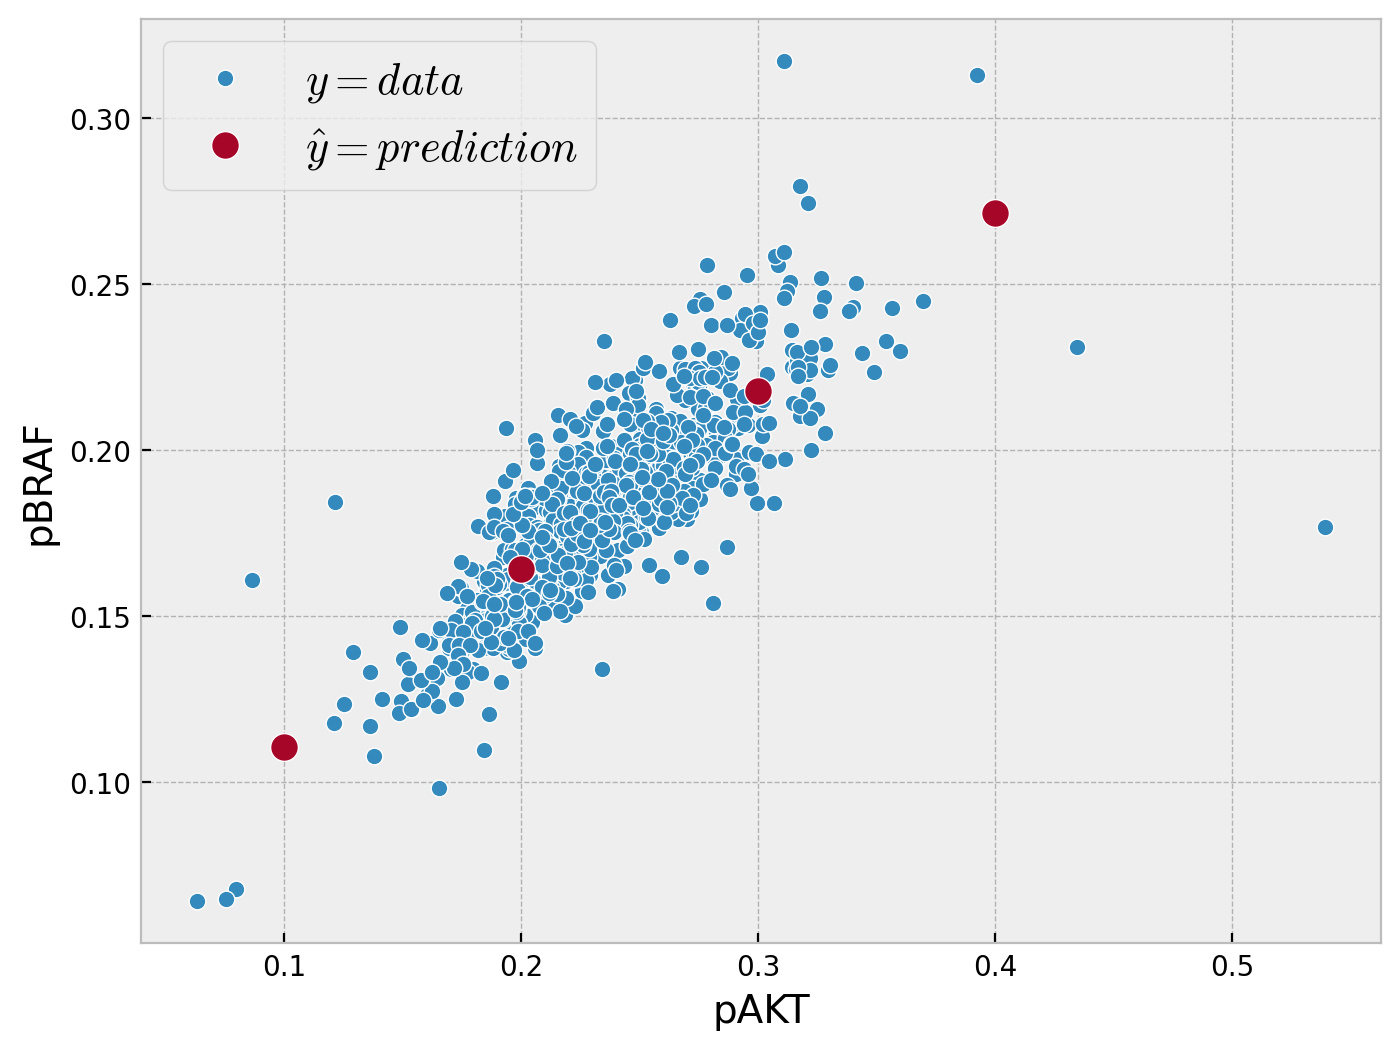

In [19]:
plt.plot(x, y, 'o', label='$y=data$')
plt.plot(new_x_values, predicted_y_values, 'o', ms=10, label=r'$\hat{y}=prediction$')
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.legend(fontsize=16);

Draw a fit line by predicting the pBRAF values for a range of pAKT values that span the dataset.

In [20]:
xfit = np.linspace(x.min(), x.max(), 100).reshape([-1,1])  # column vector
yfit = model.predict(xfit)

xfit.shape, yfit.shape

((100, 1), (100,))

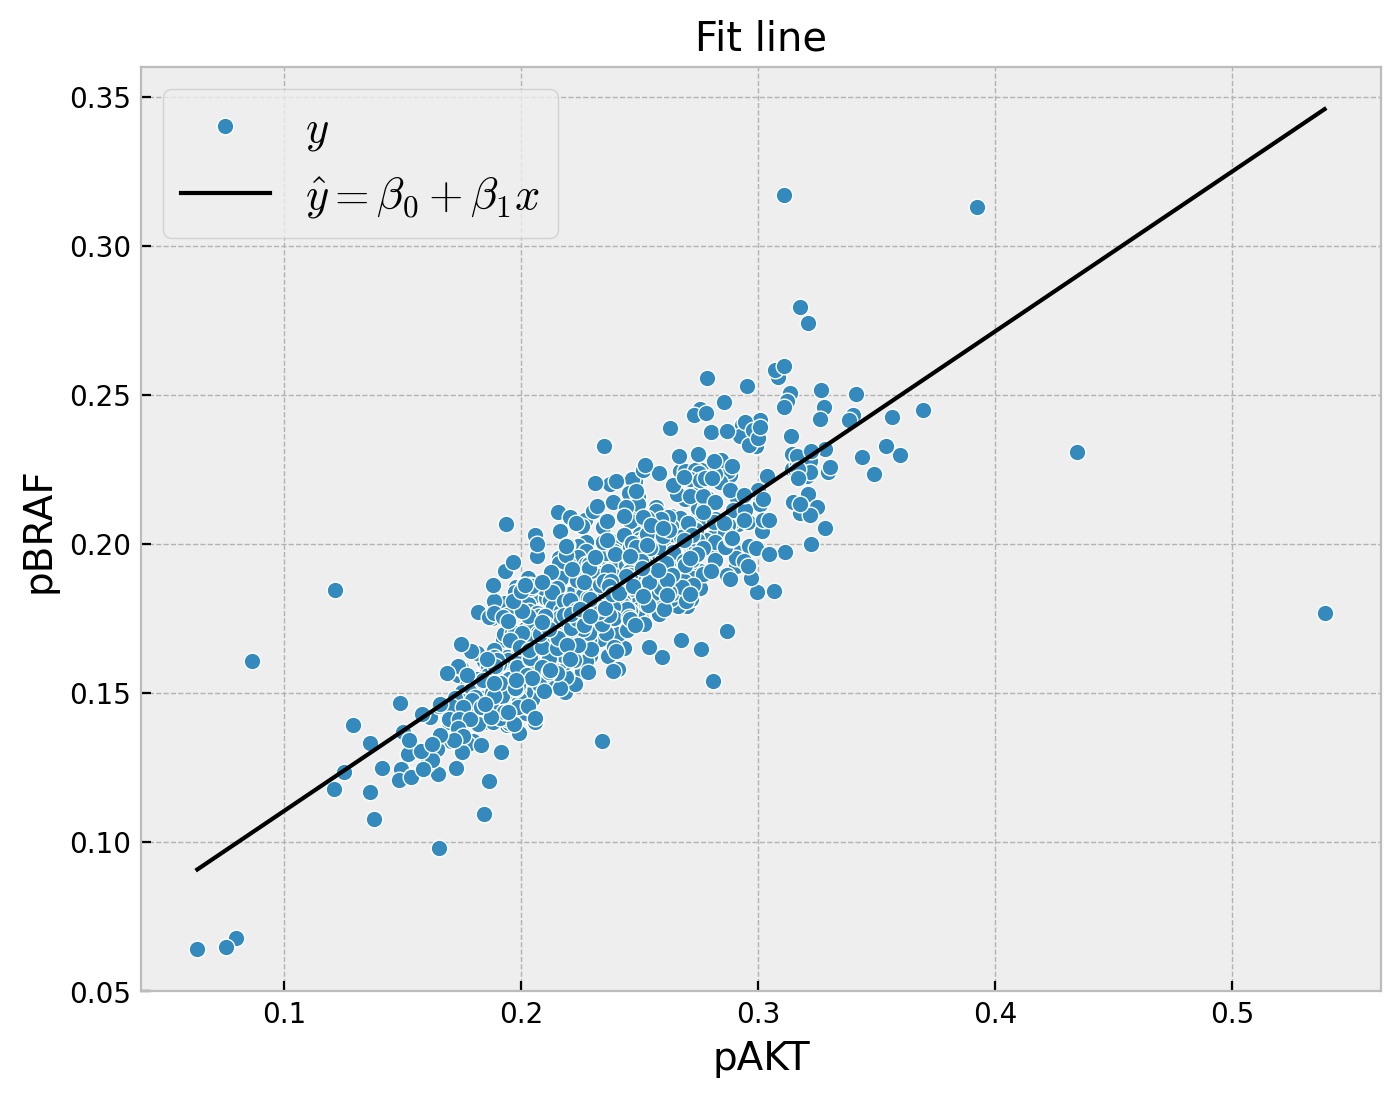

In [21]:
plt.plot(x, y, 'o', label='$y$')
plt.plot(xfit, yfit, 'k', label=r'$\hat{y} = \beta_0 + \beta_1 x$')
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.title('Fit line')
plt.legend(fontsize=16);

Residuals are the difference between the actual data and the model prediction.

In [22]:
ymodel = model.predict(x)

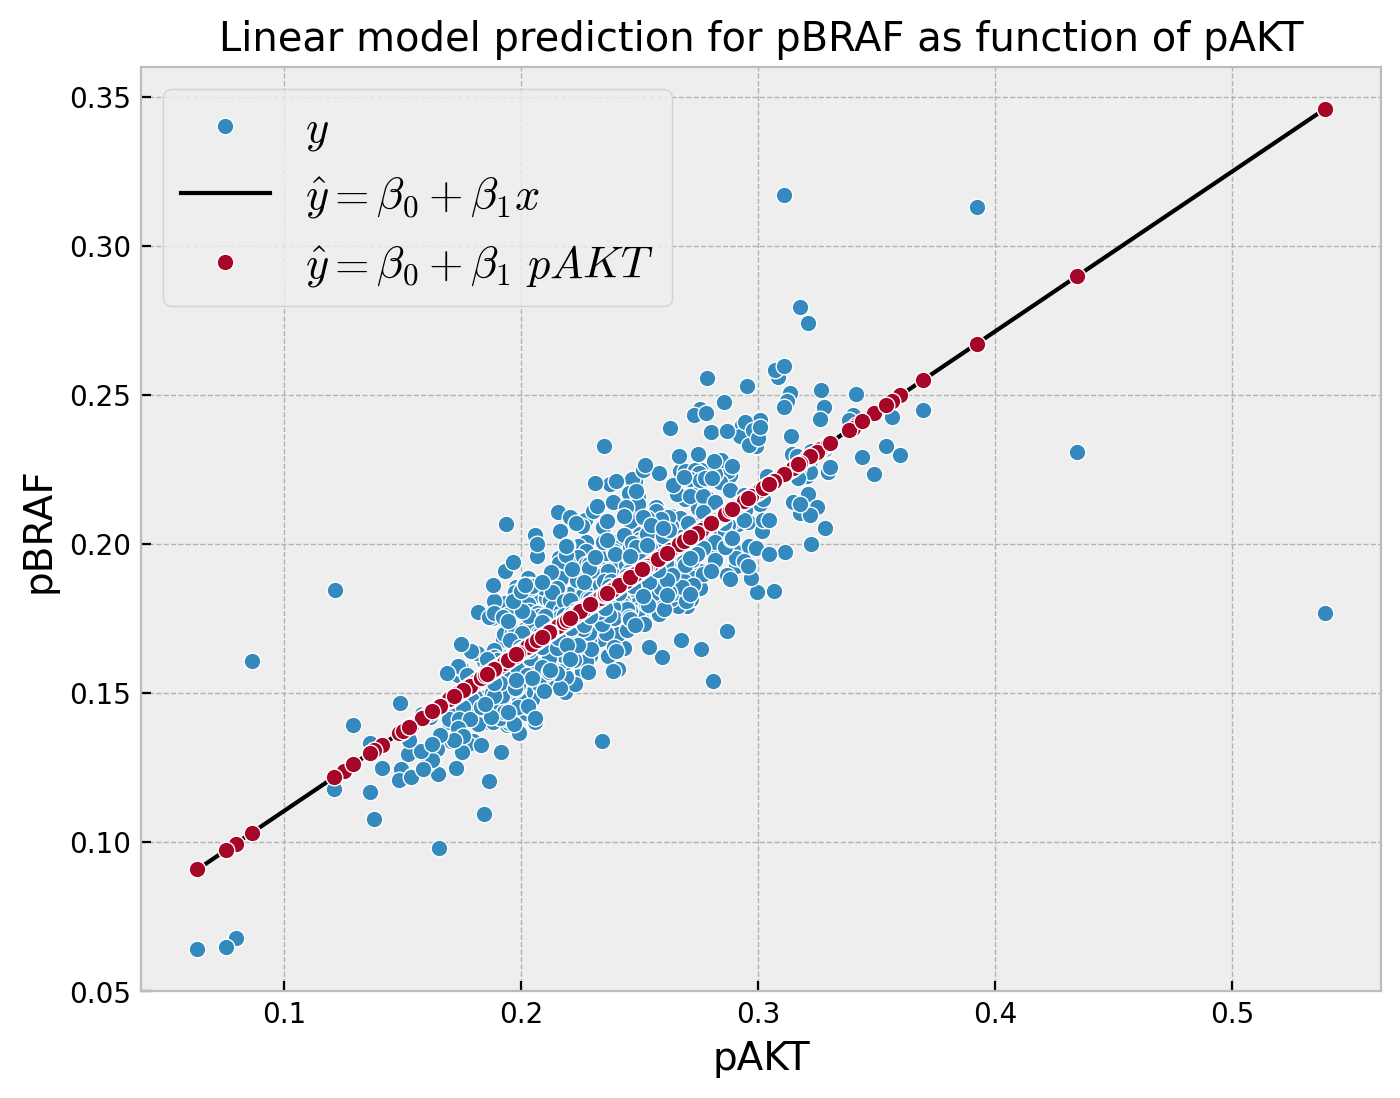

In [23]:
plt.plot(x, y, 'o', label='$y$')
plt.plot(xfit, yfit, 'k', label=r'$\hat{y} = \beta_0 + \beta_1 x$')
plt.plot(x, ymodel, 'o', label=r'$\hat{y} = \beta_0 + \beta_1 \ pAKT$')
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.title('Linear model prediction for pBRAF as function of pAKT')
plt.legend(fontsize=16);

In [24]:
residuals = y - ymodel

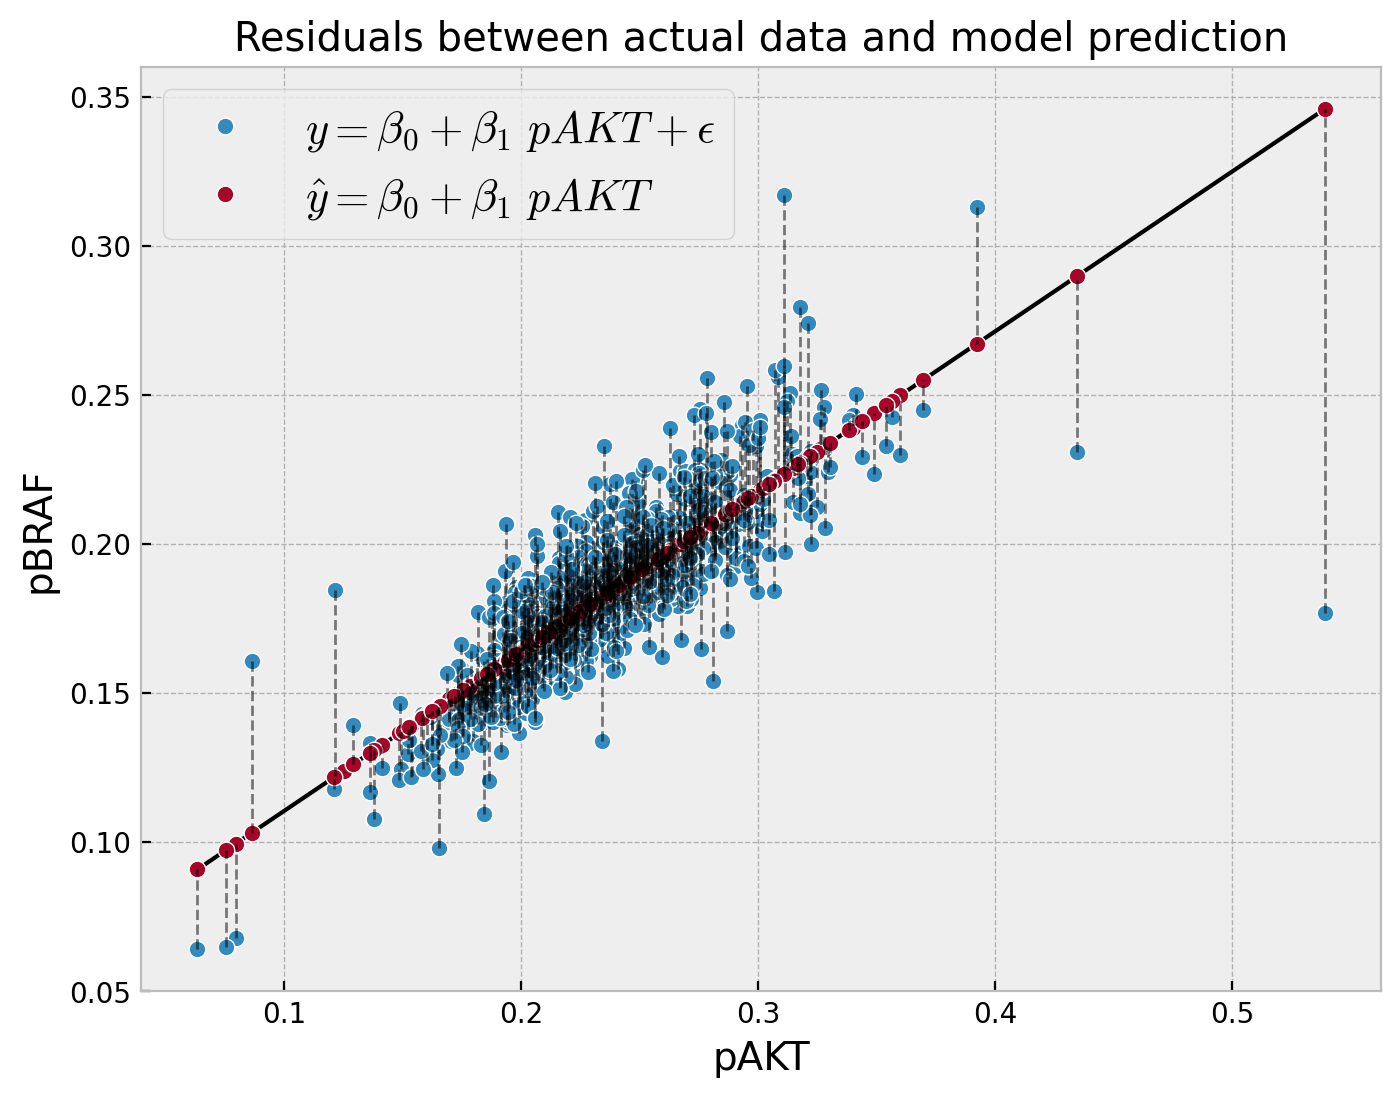

In [25]:
plt.plot(x, y, 'o', label=r'$y = \beta_0 + \beta_1 \ pAKT + \epsilon$')
plt.plot(xfit, yfit, 'k')
plt.plot(x, ymodel, 'o', label=r'$\hat{y} = \beta_0 + \beta_1 \ pAKT$')
plt.plot(np.hstack([x, x]).T, np.hstack([y.reshape([-1,1]), ymodel.reshape([-1,1])]).T, 'k--', lw=1, alpha=0.5)
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.title('Residuals between actual data and model prediction')
plt.legend(fontsize=16);

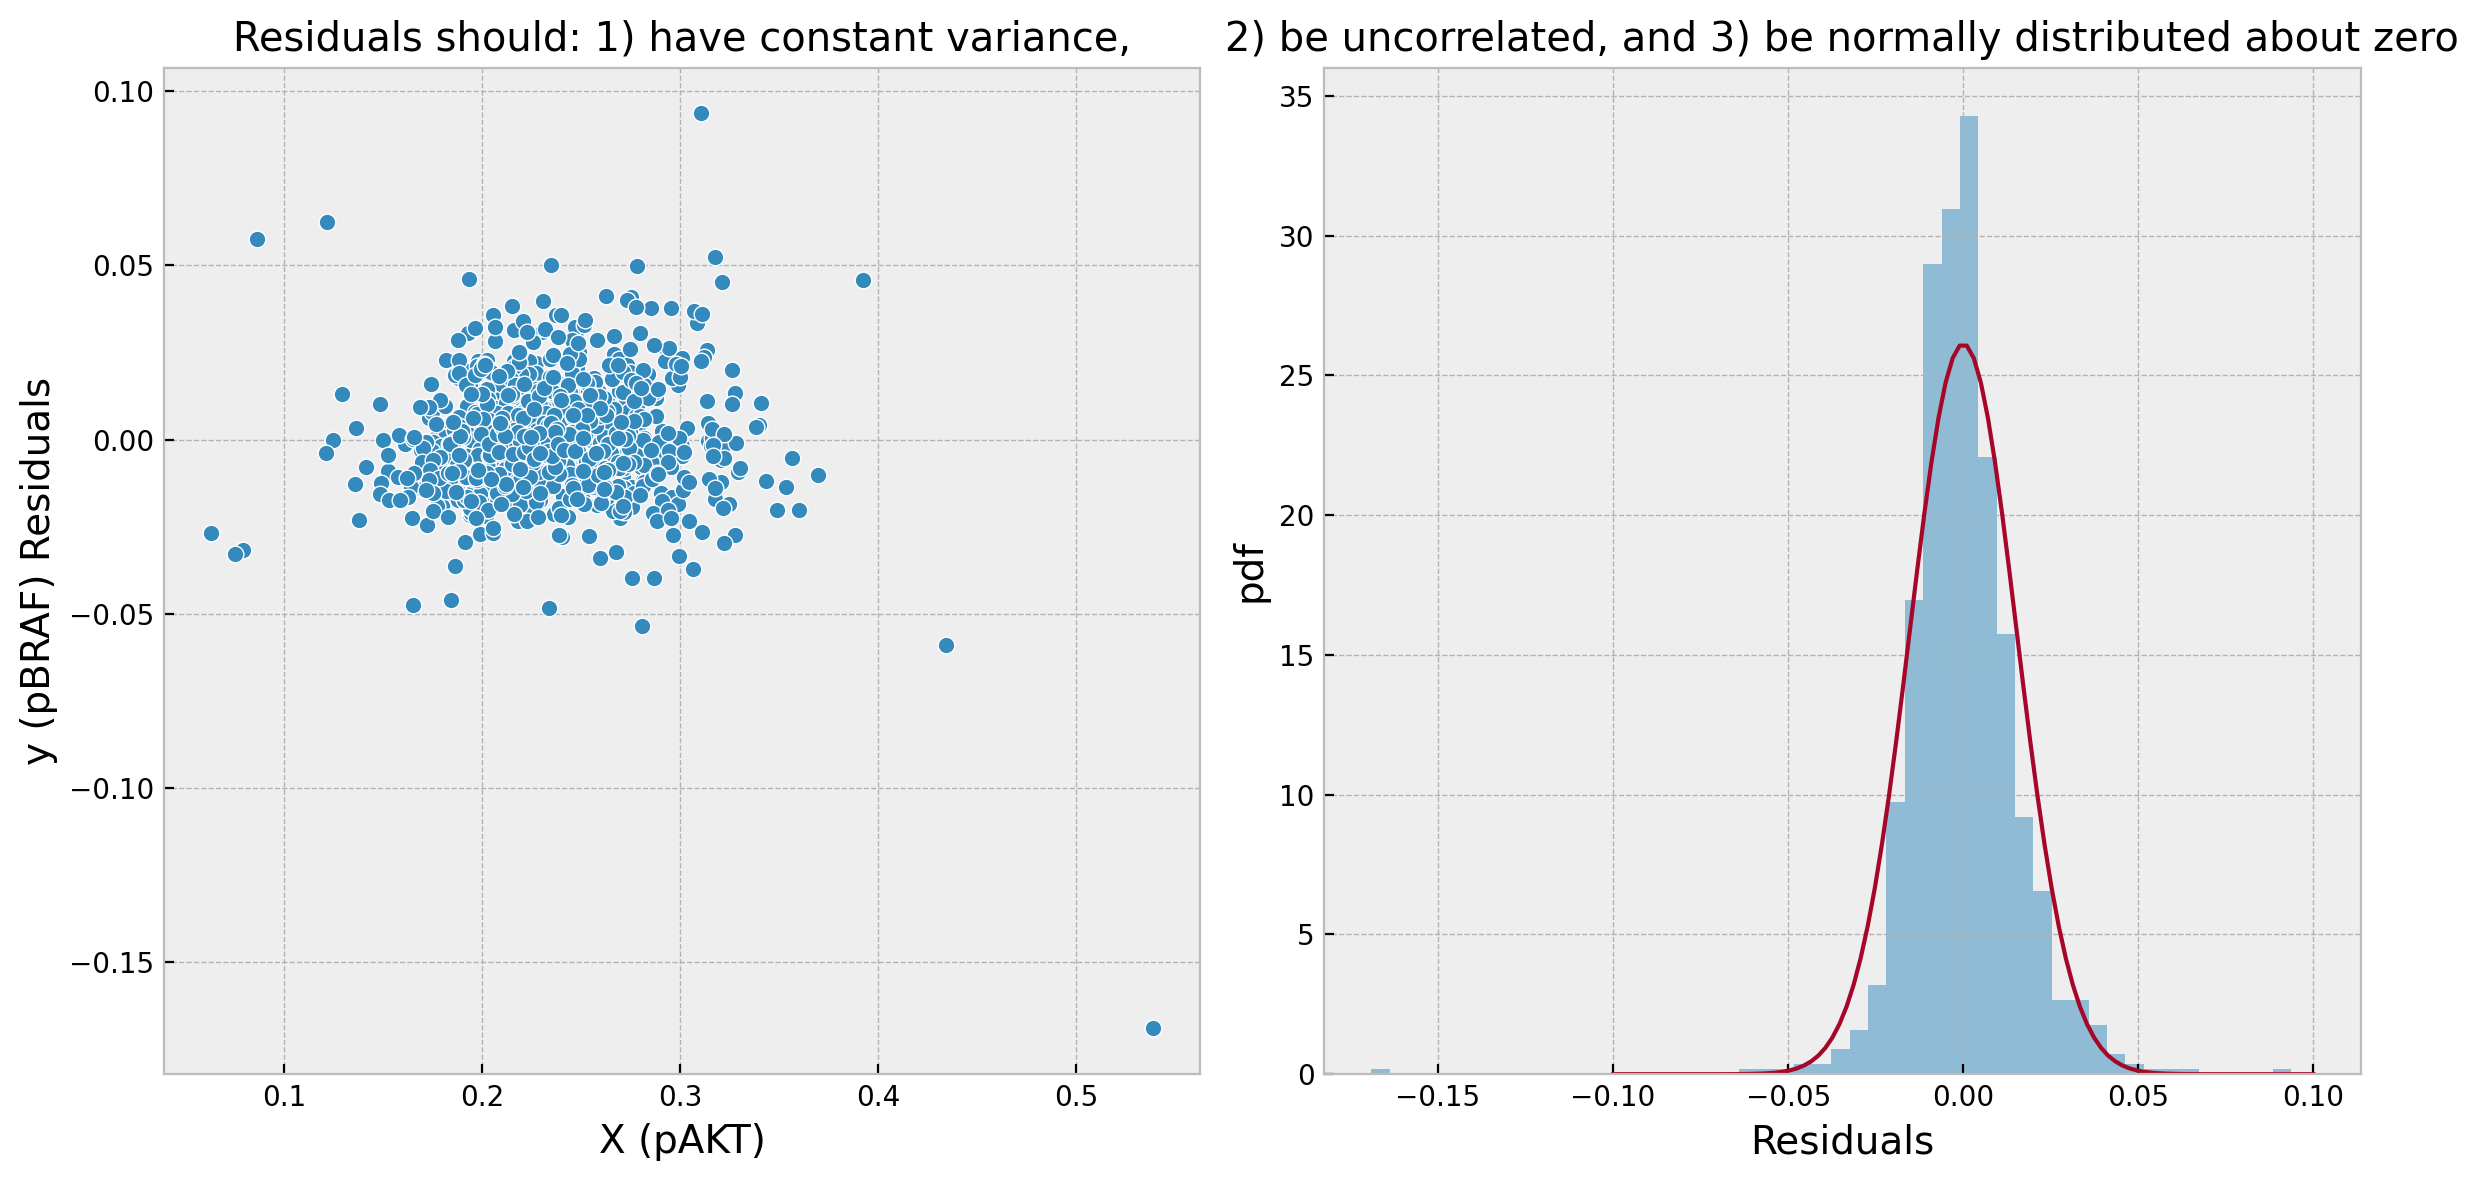

In [26]:
# residuals
plt.figure(figsize=[12,6])
plt.subplot(121)
plt.plot(x, residuals, 'o')
plt.xlabel('X (pAKT)')
plt.ylabel('y (pBRAF) Residuals')
plt.title('Residuals should: 1) have constant variance,')
plt.subplot(122)
plt.hist(residuals, 50, density=True, alpha=0.5)
import scipy.stats as st
rx = np.linspace(-0.1, 0.1, 100)
pdf = st.norm(residuals.mean(), residuals.std()).pdf(rx)
plt.plot(rx, pdf)
plt.xlabel('Residuals')
plt.ylabel('pdf')
plt.title('2) be uncorrelated, and 3) be normally distributed about zero')
plt.tight_layout();

Residuals should be centered around zero. If not, a linear fit may not be appropriate.

![](images/linear_vs_quadratic_residuals.png)

Variance should be constant. If not, can you transform the data to achieve this?

![](images/y_vs_logy_residuals.png)

Outliers can be identified as extreme residuals.

Studentized residuals are the residuals divided by their standard deviation, which can be useful for quantifying extreme residuals (e.g., larger than a few standard deviations).

![](images/outliers.png)

# Exercise

1. Studentize `residuals` by dividing them by their standard deviation.
2. Make a scatter plot of the studentized residuals vs. `x`.
3. Identify outliers with studentized residuals larger than a few standard deviations.

Outliers with high leverage have the most impact on your model. Both data points 20 and 41 are outliers, but 41 has more leverage than 20.

![](images/leverage.png)

### leverage for $i^{th}$ data point: $h_i = \frac{1}{n} + \frac{(X_i - \bar{X})^2}{\sum_{j=1}^n{(X_j - \bar{X})^2}}$

In [27]:
leverage = 1/len(x) + (x - x.mean())**2 / ((x - x.mean())**2).sum()

In [28]:
outlier = np.abs(residuals / residuals.std()) > 3
highleverage = (leverage > 0.01).reshape(-1)

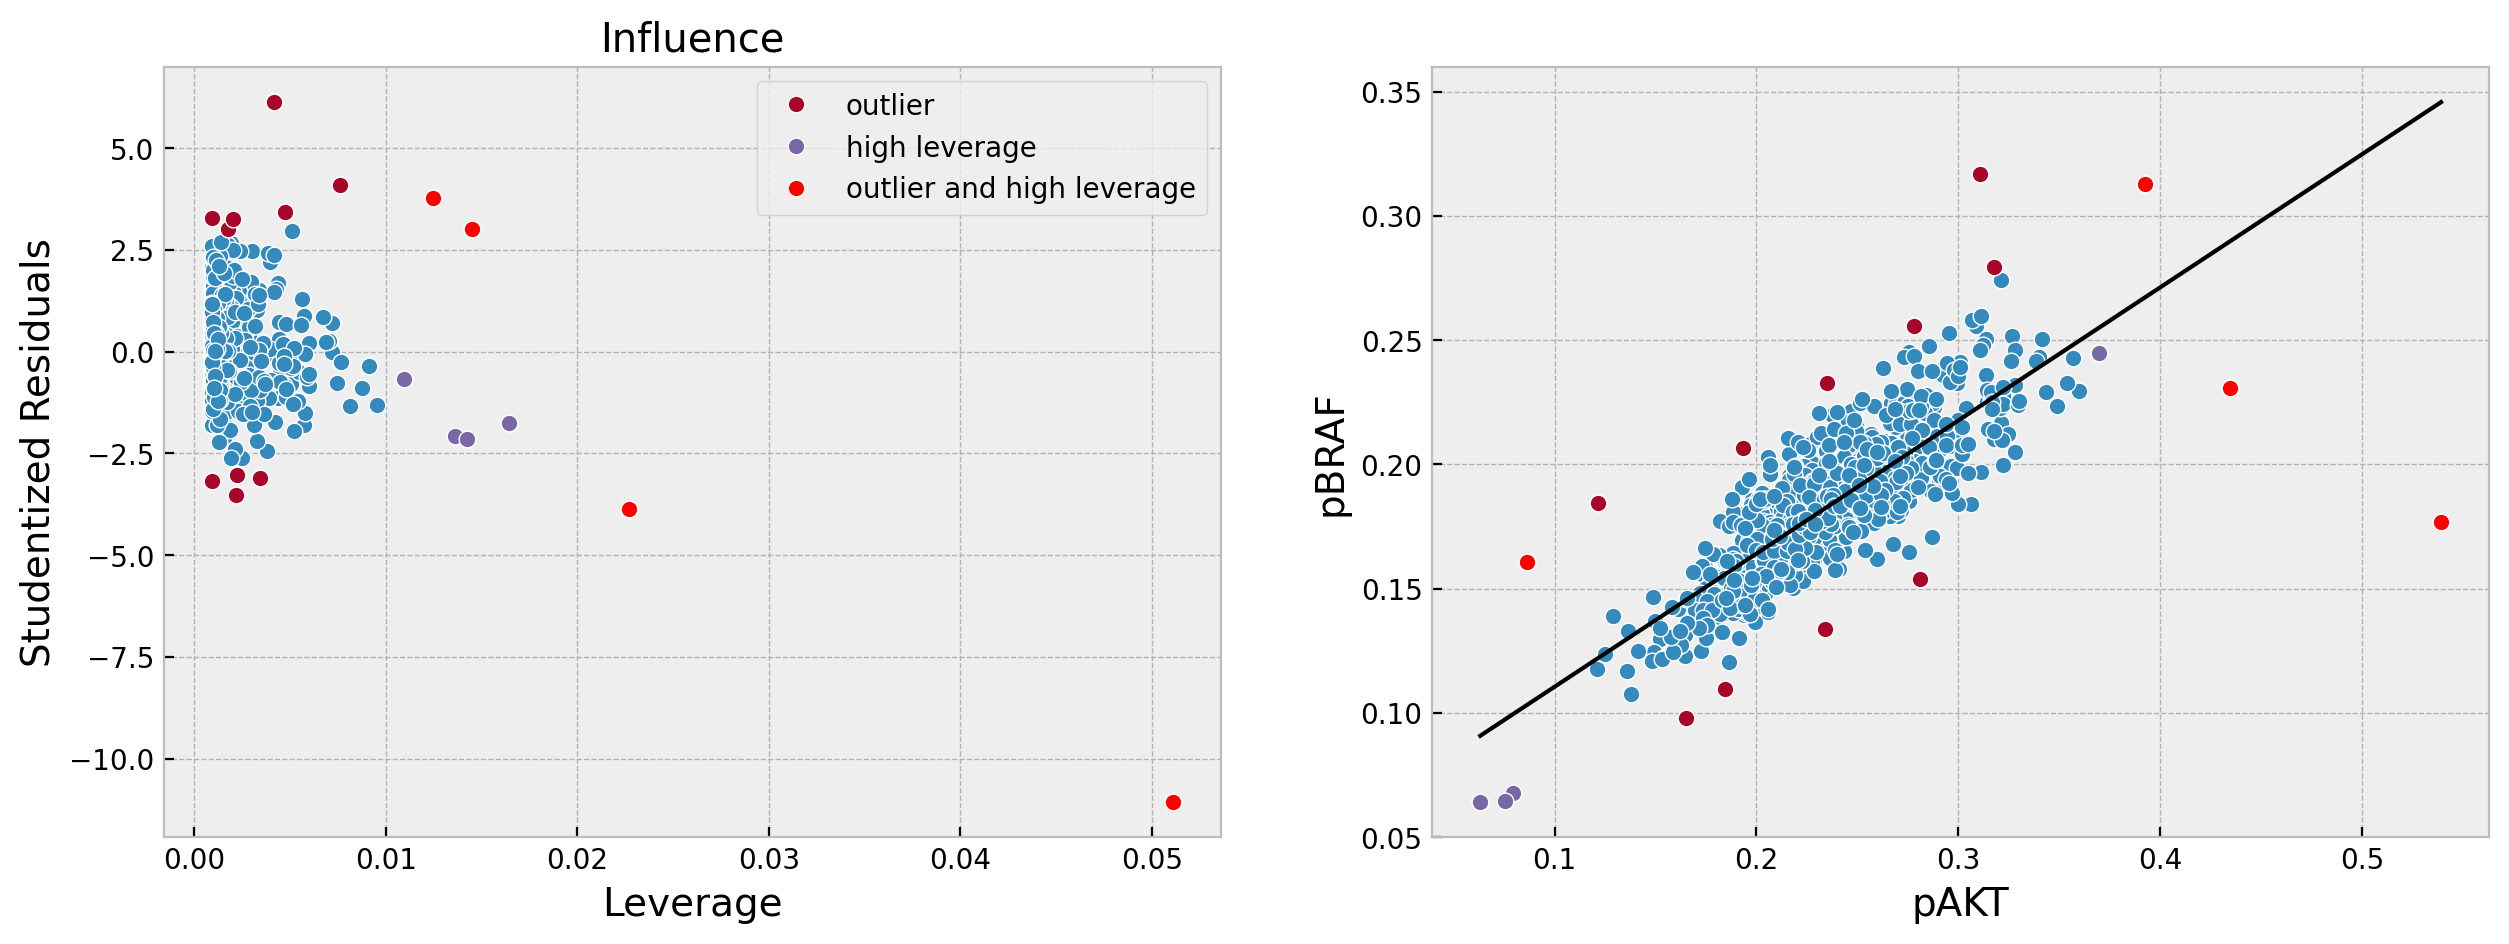

In [29]:
# outliers and leverage
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.plot(leverage, residuals / residuals.std(), 'o')
plt.plot(leverage[outlier], residuals[outlier] / residuals.std(), 'o', label='outlier')
plt.plot(leverage[highleverage], residuals[highleverage] / residuals.std(), 'o', label='high leverage')
plt.plot(leverage[outlier & highleverage], residuals[outlier & highleverage] / residuals.std(), 'ro', label='outlier and high leverage')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')
plt.title('Influence')
plt.legend()
plt.subplot(122)
plt.plot(x, y, 'o')
plt.plot(x[outlier], y[outlier], 'o', label='outlier')
plt.plot(x[highleverage], y[highleverage], 'o', label='high leverage')
plt.plot(x[outlier & highleverage], y[outlier & highleverage], 'ro', label='outlier and high leverage')
plt.plot(xfit, yfit, 'k')
plt.xlabel('pAKT')
plt.ylabel('pBRAF');

### statsmodels
`statsmodels` package has some nice analytical prebaked plots.

```shell
pip install statsmodels
```

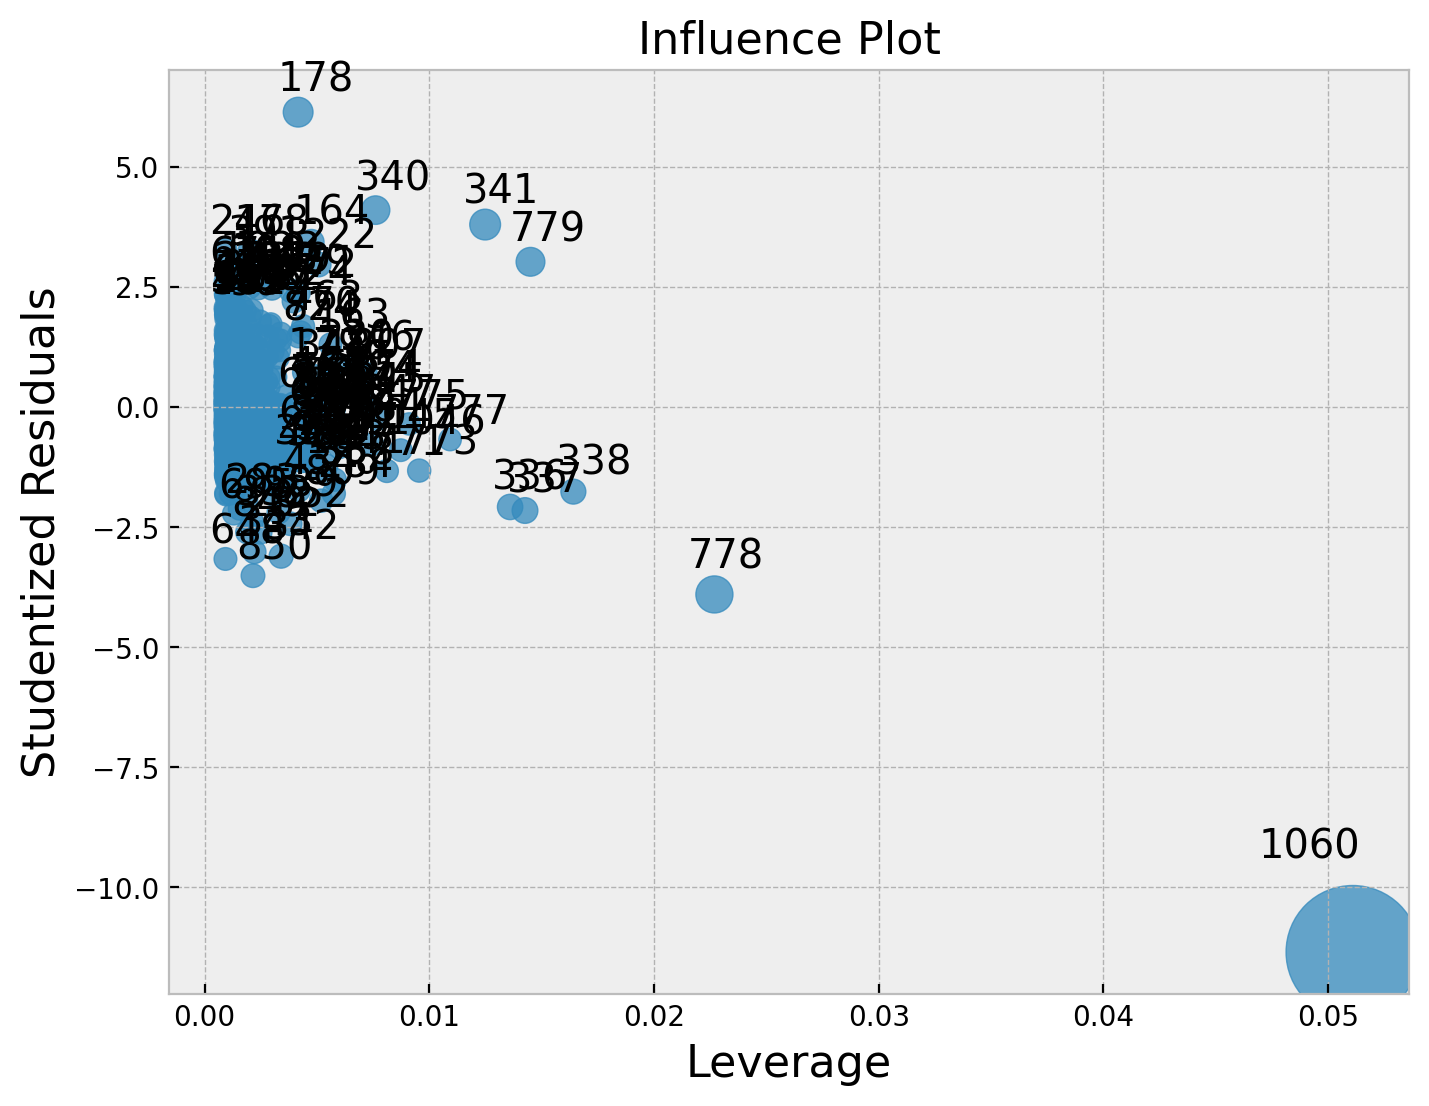

In [30]:
import statsmodels.api as sm

linear_model = sm.OLS(y, sm.add_constant(x))
results = linear_model.fit()
results.get_influence().plot_influence();

How confident are you in the model?

i.e., What are your confidence intervals for the model's parameters (intercept, slope).

In [31]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     2293.
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          7.28e-269
Time:                        11:53:28   Log-Likelihood:                 2975.7
No. Observations:                1077   AIC:                            -5947.
Df Residuals:                    1075   BIC:                            -5937.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0569      0.003     21.460      0.0

If we collected a new set of data points that are a bit different from the first set due to random variation, how much would that affect our linear model?

* Large effect ==> we are not very confident in our model parameters (intercept, slope) as it is highly influenced by random variation in the dataset
* Small effect ==> we are more confident in our model parameters (intercept, slope) despite random variation in the dataset 

# Question?

How can we simulate collecting a new dataset without actually doing it?

Bootstrap sample from a collection of $(x,y)$ data points.

Consider a sample dataset: $(x_0,y_0), (x_1,y_1), (x_2,y_2), (x_3,y_3), (x_4,y_4)$

If you randomly choose $x_3, x_4, x_3, x_0, x_1$ as your bootstrapped $x$ values,

then you MUST choose $y_3, y_4, y_3, y_0, y_1$ as your bootstrapped $y$ values.

In [32]:
xy = np.random.randint(0, 9, size=(5,2))
xy

array([[4, 5],
       [2, 2],
       [4, 1],
       [7, 5],
       [5, 2]])

In [33]:
# bootstrap sample data point indices
ind = np.random.choice(np.arange(5), size=5, replace=True)
ind

array([4, 2, 3, 2, 3])

In [34]:
bootstrap_xy = xy[ind,:]
bootstrap_xy

array([[5, 2],
       [4, 1],
       [7, 5],
       [4, 1],
       [7, 5]])

Use bootstrap to simulate plausible pAKT vs. pBRAF datasets.

Fit a linear model to each bootstrapped dataset and use the distribution of slopes and intercepts to get confidience limits on these parameters.

In [35]:
n = 1000
bs_models = []
bs_slopes = np.zeros((n,))
bs_intercepts = np.zeros((n,))
for i in range(n):
    ind = np.random.choice(np.arange(len(y)), size=len(y), replace=True)
    bs_x = x[ind]
    bs_y = y[ind]
    bs_model = LinearRegression()
    bs_model.fit(bs_x, bs_y)
    bs_models.append(bs_model)
    bs_slopes[i] = bs_model.coef_[0]
    bs_intercepts[i] = bs_model.intercept_

slope_CI = np.quantile(bs_slopes, [0.025, 0.975])
intercept_CI = np.quantile(bs_intercepts, [0.025, 0.975])

Best estimate for model parameters is from fitting actual data.

In [36]:
model = LinearRegression()
model.fit(x, y)

slope = model.coef_[0]
intercept = model.intercept_

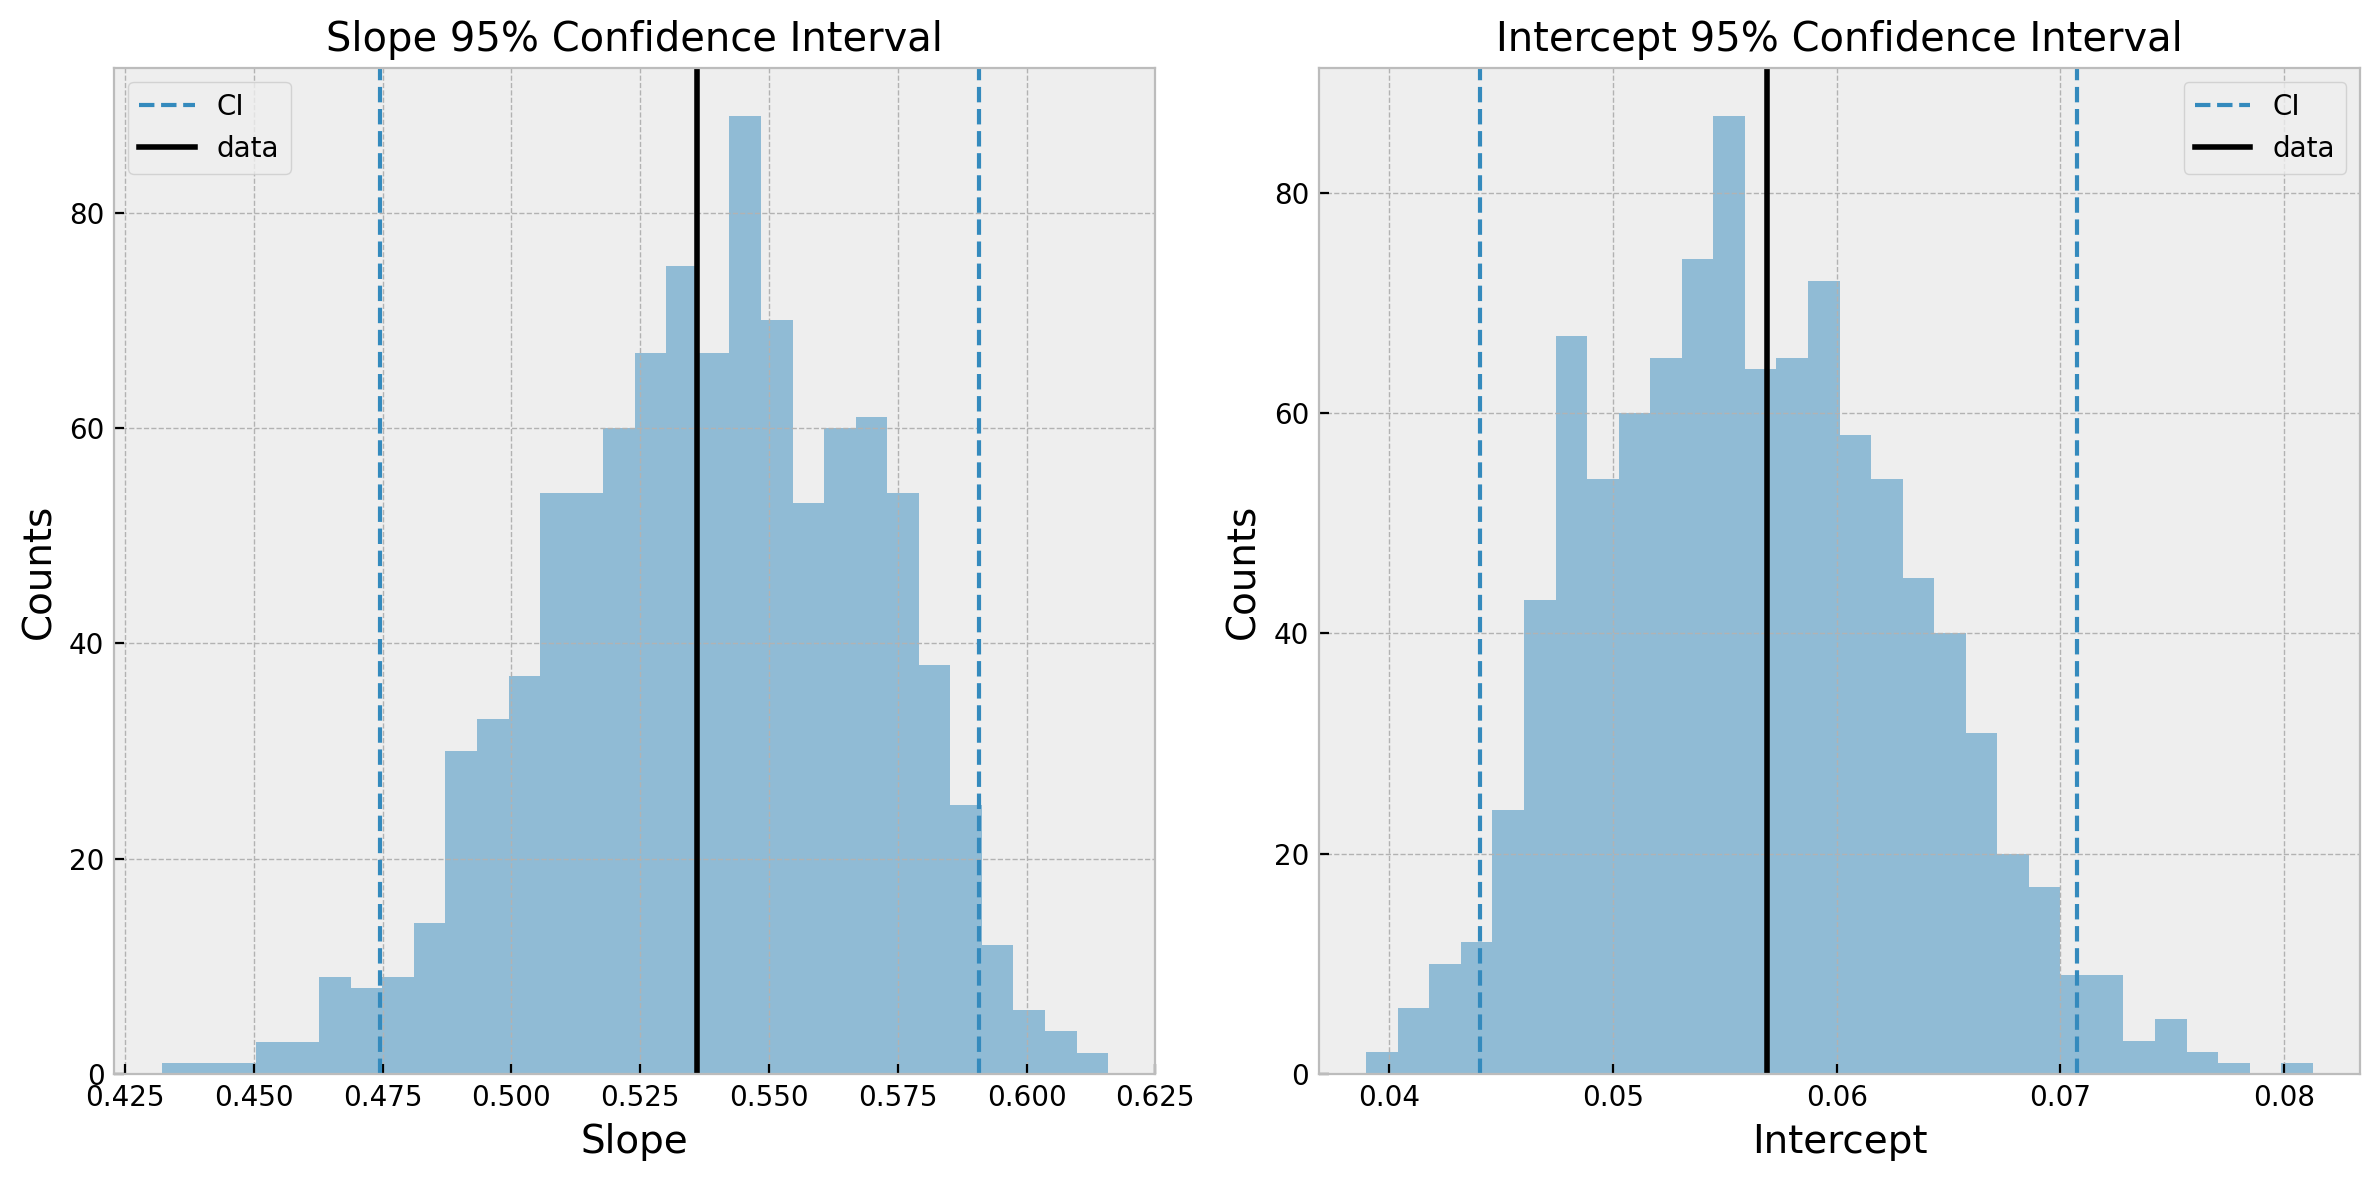

In [37]:
# slope and intercept confidence limits
plt.figure(figsize=[12,6])
plt.subplot(121)
plt.hist(bs_slopes, 30, alpha=0.5)
plt.axvline(slope_CI[0], ls='--', label='CI')
plt.axvline(slope_CI[1], ls='--')
plt.axvline(slope, ls='-', lw=2, color='k', label='data')
plt.xlabel('Slope')
plt.ylabel('Counts')
plt.title('Slope 95% Confidence Interval')
plt.legend()

plt.subplot(122)
plt.hist(bs_intercepts, 30, alpha=0.5)
plt.axvline(intercept_CI[0], ls='--', label='CI')
plt.axvline(intercept_CI[1], ls='--')
plt.axvline(intercept, ls='-', lw=2, color='k', label='data')
plt.xlabel('Intercept')
plt.ylabel('Counts')
plt.title('Intercept 95% Confidence Interval')
plt.legend()
plt.tight_layout();

Use the bootstrapped linear models to visualize how random variation in the dataset could affect the fit line.

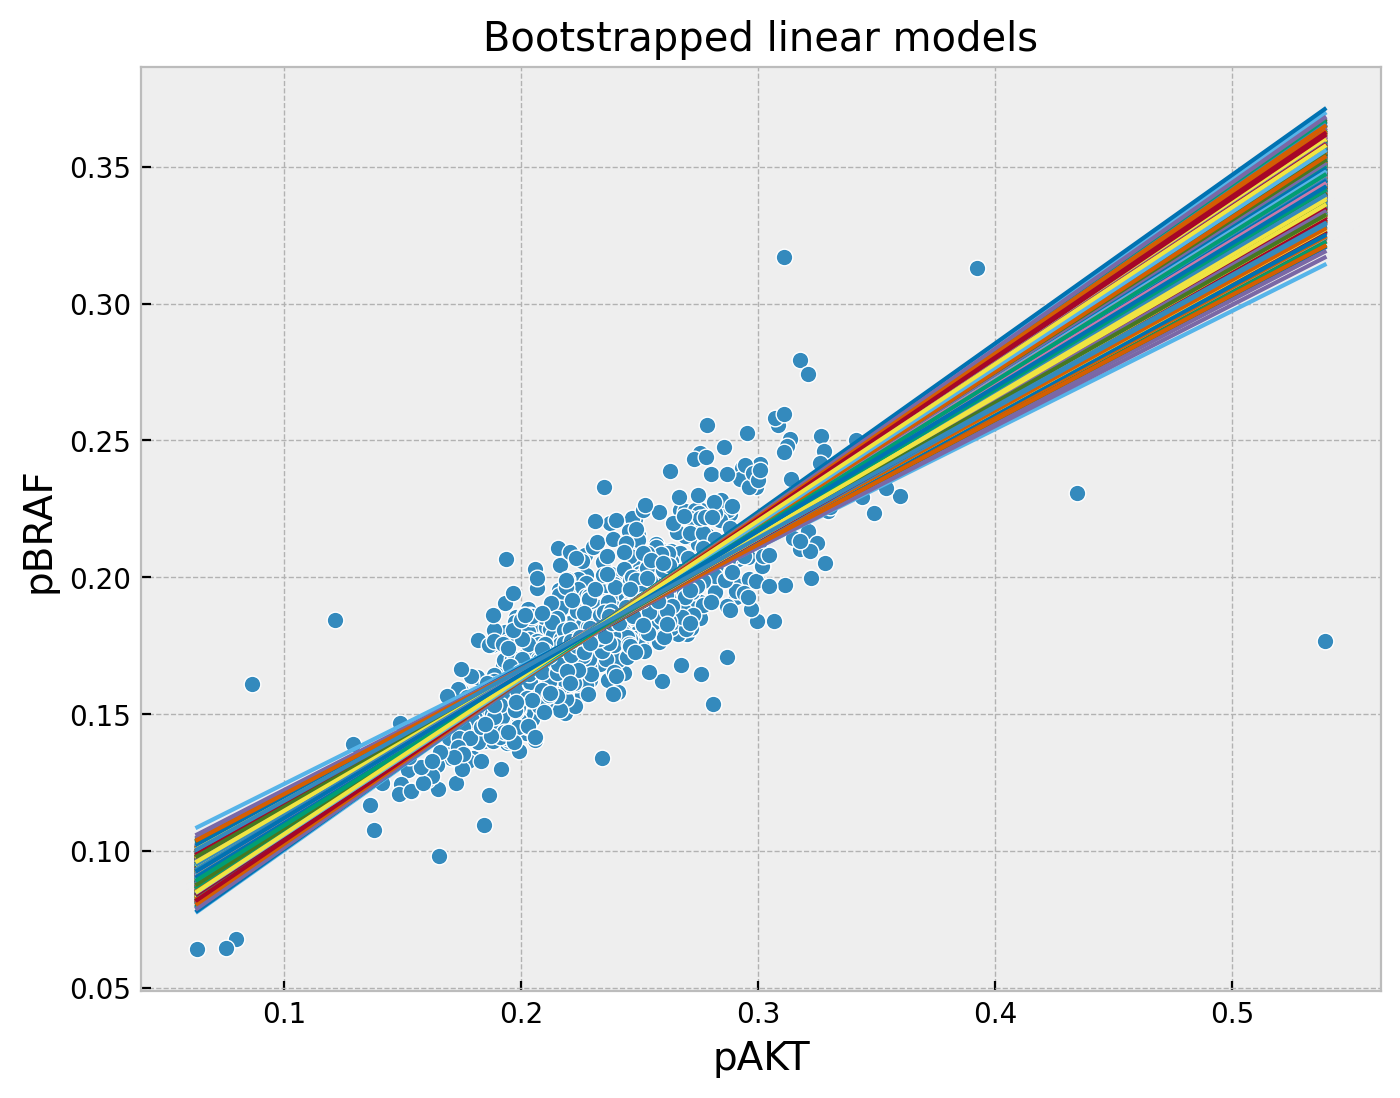

In [38]:
plt.plot(x, y, 'o')
for bs_model in bs_models:
    yfit = bs_model.predict(xfit)
    plt.plot(xfit, yfit)
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.title("Bootstrapped linear models");

Get the 95% confidence evelope for the fit line from the bootstrapped fit lines.

In [39]:
# each column of yfits is a bootstrapped fit line (over the x-values in xfit)
n = len(bs_models)
yfits = np.zeros((len(xfit), n))
for i in range(n):
    yfits[:,i] = bs_models[i].predict(xfit)

lb, ub = np.quantile(yfits, [0.025, 0.975], axis=1)

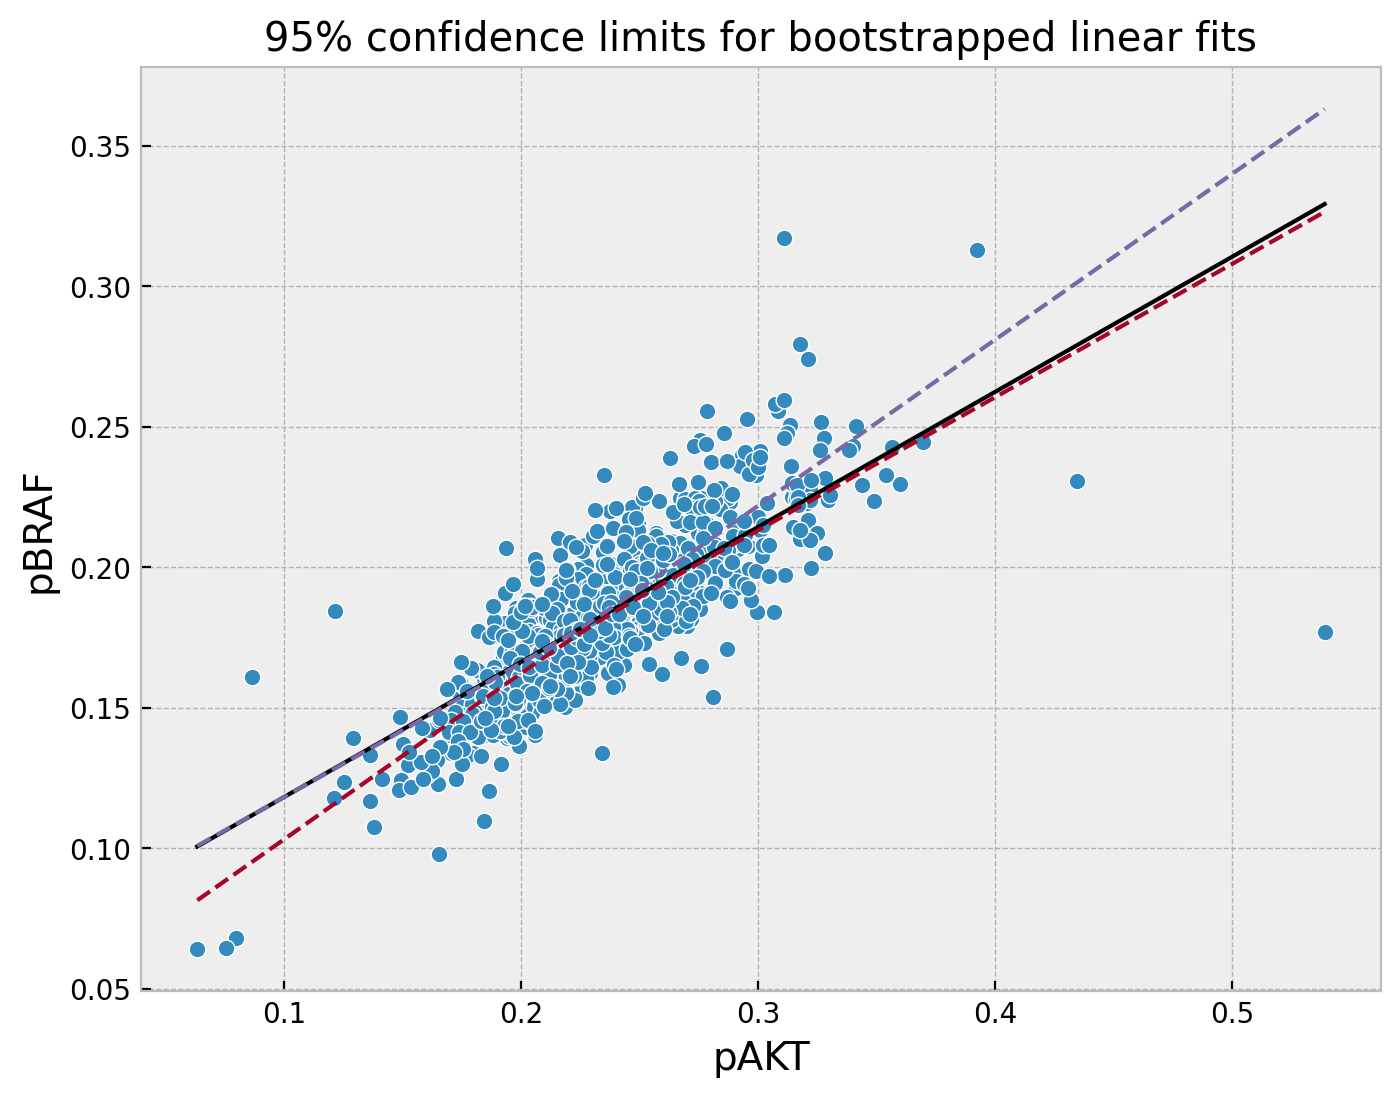

In [40]:
# line ci envelope
plt.plot(x, y, 'o')
plt.plot(xfit, yfit, 'k')
plt.plot(xfit, lb, '--')
plt.plot(xfit, ub, '--')
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.title("95% confidence limits for bootstrapped linear fits");

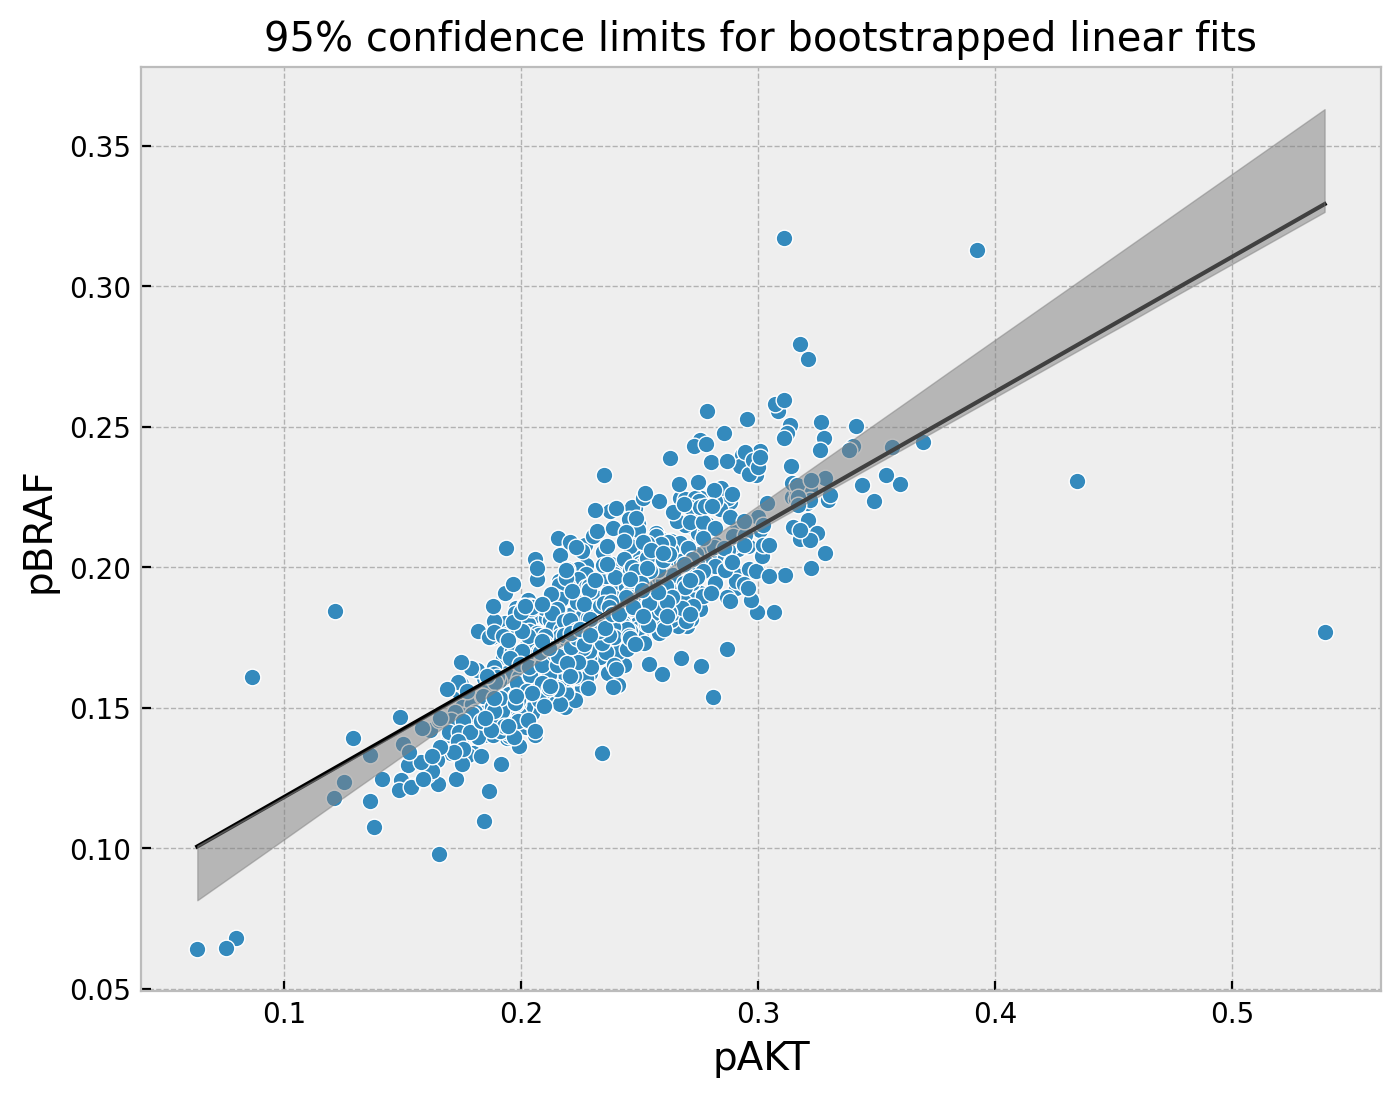

In [41]:
plt.plot(x, y, 'o')
plt.plot(xfit, yfit, 'k')
# zorder ensures fill is in front of everything else
plt.fill_between(xfit.reshape((-1)), lb, ub, color='gray', alpha=0.5, zorder=10)  # xfit must be 1-dimensional!
plt.xlabel('pAKT')
plt.ylabel('pBRAF')
plt.title("95% confidence limits for bootstrapped linear fits");

Seaborn `lmplot` provides this visualization out of the box.

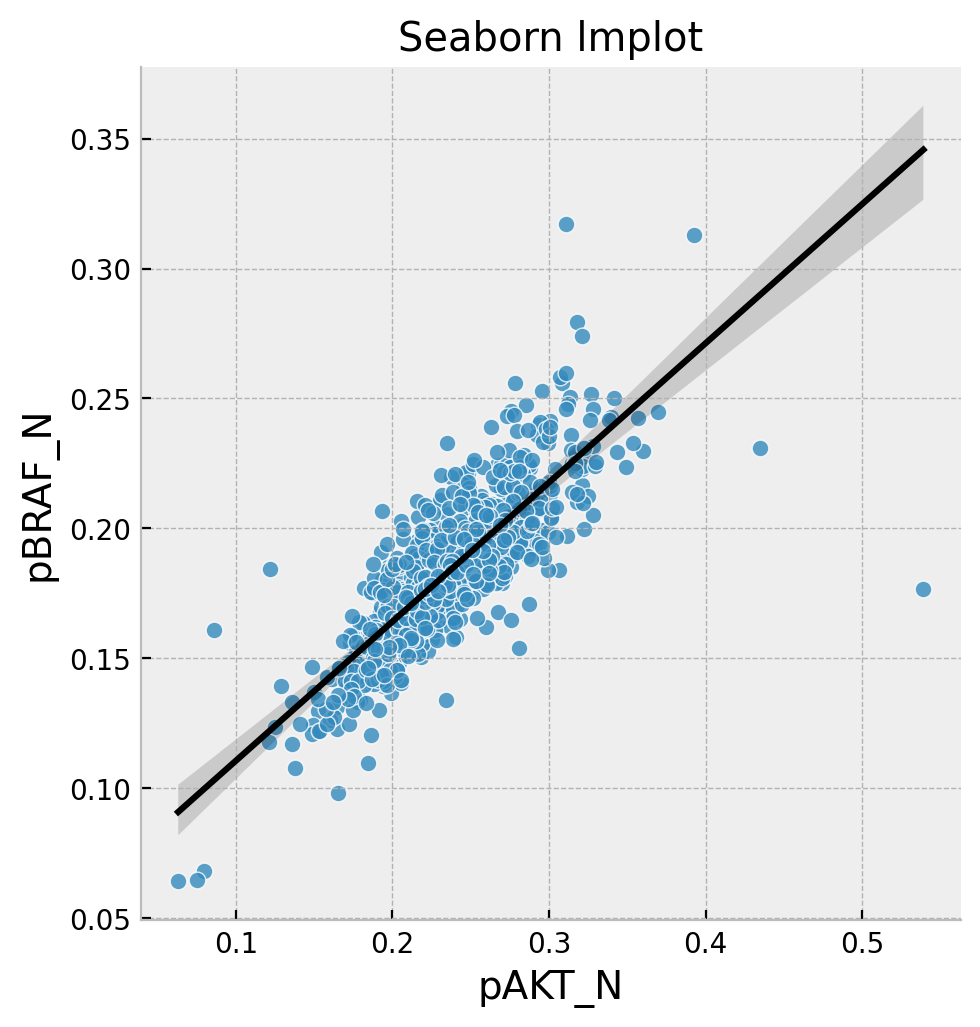

In [42]:
sns.lmplot(data=df, x='pAKT_N', y='pBRAF_N', 
           scatter_kws={'edgecolor': 'w', 'linewidths': 0.5}, line_kws={'color': 'k'});
plt.title('Seaborn lmplot');

### Linear Regression

### $y = f(X) = \beta_0 + \beta_1 X$

### Multiple Linear Regression

### $y = f(X_1, X_2, ..., X_N) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_N X_N$

This is a (hyper)surface for the target prediction over multiple feature dimensions. Still easy to interpret even for many features even if it is not straightforward to visualize a model with more than two features.

![](images/ols2d.png)

Let's start with a linear model with multiple features $x_1, x_2, \dots, x_n$.

$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$

In matrix form, each row is a different data point in the dataset (e.g., a different set of features $x_1, x_2, \dots, x_n$ and the prediction for those features $\hat{y}$).

$\begin{bmatrix} \vdots \\ \hat{y} \\ \vdots \end{bmatrix} = \beta_0
+ \beta_1 \begin{bmatrix} \vdots \\ x_1 \\ \vdots \end{bmatrix}
+ \beta_2 \begin{bmatrix} \vdots \\ x_2 \\ \vdots \end{bmatrix}
+ \dots
+ \beta_n \begin{bmatrix} \vdots \\ x_n \\ \vdots \end{bmatrix}$

We can combine each feature column into one big matrix.

$X = 
\begin{bmatrix} 
\vdots & \vdots & & \vdots \\ 
x_1 & x_2 & \dots & x_n \\ 
\vdots & \vdots & & \vdots 
\end{bmatrix}$

Meseares of various features vs. diabetes disease progression for 442 patients.

Available at https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt

In [43]:
db = pd.read_csv('data/diabetes.csv')
db

AGE  SEX   BMI      BP   TC    LDL   HDL   TCH     LTG  GLU  DIS
0     59    2  32.1  101.00  157   93.2  38.0  4.00  4.8598   87  151
1     48    1  21.6   87.00  183  103.2  70.0  3.00  3.8918   69   75
2     72    2  30.5   93.00  156   93.6  41.0  4.00  4.6728   85  141
3     24    1  25.3   84.00  198  131.4  40.0  5.00  4.8903   89  206
4     50    1  23.0  101.00  192  125.4  52.0  4.00  4.2905   80  135
..   ...  ...   ...     ...  ...    ...   ...   ...     ...  ...  ...
437   60    2  28.2  112.00  185  113.8  42.0  4.00  4.9836   93  178
438   47    2  24.9   75.00  225  166.0  42.0  5.00  4.4427  102  104
439   60    2  24.9   99.67  162  106.6  43.0  3.77  4.1271   95  132
440   36    1  30.0   95.00  201  125.2  42.0  4.79  5.1299   85  220
441   36    1  19.6   71.00  250  133.2  97.0  3.00  4.5951   92   57

[442 rows x 11 columns]

### $dis = f(age, sex, bmi, bp, tc, ldl, hdl, tch, ltg, glu)$

### $dis = \beta_0 + \beta_1 \ age + \beta_2 \ sex + \beta_3 \ bmi + ... + \beta_{10} \ glu$

The features and target data.

In [44]:
X = db.loc[:,'AGE':'GLU'].to_numpy()
y = db['DIS'].to_numpy()

X.shape, y.shape

((442, 10), (442,))

In [45]:
names = list(db.columns.values)
features = names[:-1]
target = names[-1]

print(features)
print(target)

['AGE', 'SEX', 'BMI', 'BP', 'TC', 'LDL', 'HDL', 'TCH', 'LTG', 'GLU']
DIS


Create the model and fit it to the data.

In [46]:
model = LinearRegression()
model.fit(X, y)

print(model.intercept_)  # y-intercept
print(model.coef_)  # slopes

-334.5671385187853
[-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]


I can't easily plot a line in more than two dimensions (e.g., $x$ vs $y$).

Instead, let's visualize how much the model prediction depends on each feature.

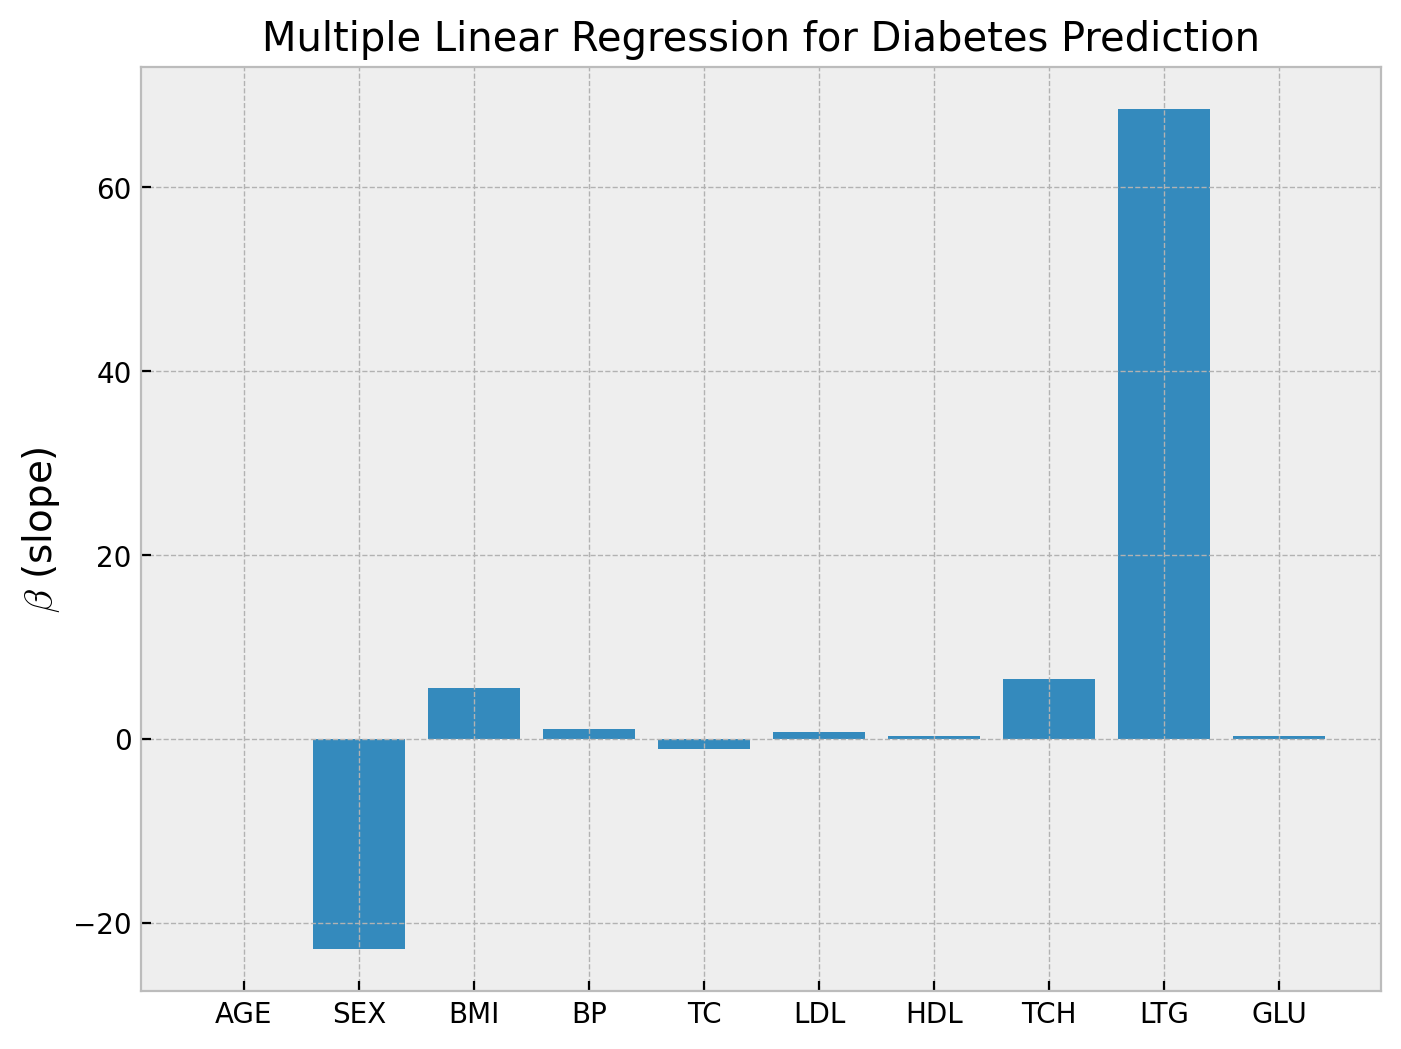

In [47]:
plt.bar(range(len(model.coef_)), model.coef_)
plt.xticks(range(len(model.coef_)), features)
plt.ylabel(r'$\beta$ (slope)')
plt.title('Multiple Linear Regression for Diabetes Prediction');

Which feature do you think is the most influential for predicting diabetes?

But the features have different unrelated units and scales!

In [48]:
db.head()

AGE  SEX   BMI     BP   TC    LDL   HDL  TCH     LTG  GLU  DIS
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598   87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918   69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728   85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903   89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905   80  135

It's not fair to compare slopes of features whose units are completely unrelated. The biggest slope will likely just reflect the feature with the largest units.

*The solution is to normalize the value range of every feature.*

!!! Just remember that to get a real world prediction for your target variable, you will need to undo this normalization.

*!!! Note that if features have the same units or the differences in their values are meaningful, then you shouldn't do this.*

Standardize data features

1. Subtract the mean of each feature so that it is centered on zero.
2. Normalize the variance of each feature by dividing by the feature's standard deviation.

In [49]:
Xs = (X - X.mean(axis=0)) / X.std(axis=0)

In [50]:
Xs.var(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Fit a model using the standardized features.

In [51]:
smodel = LinearRegression()
smodel.fit(Xs, y);

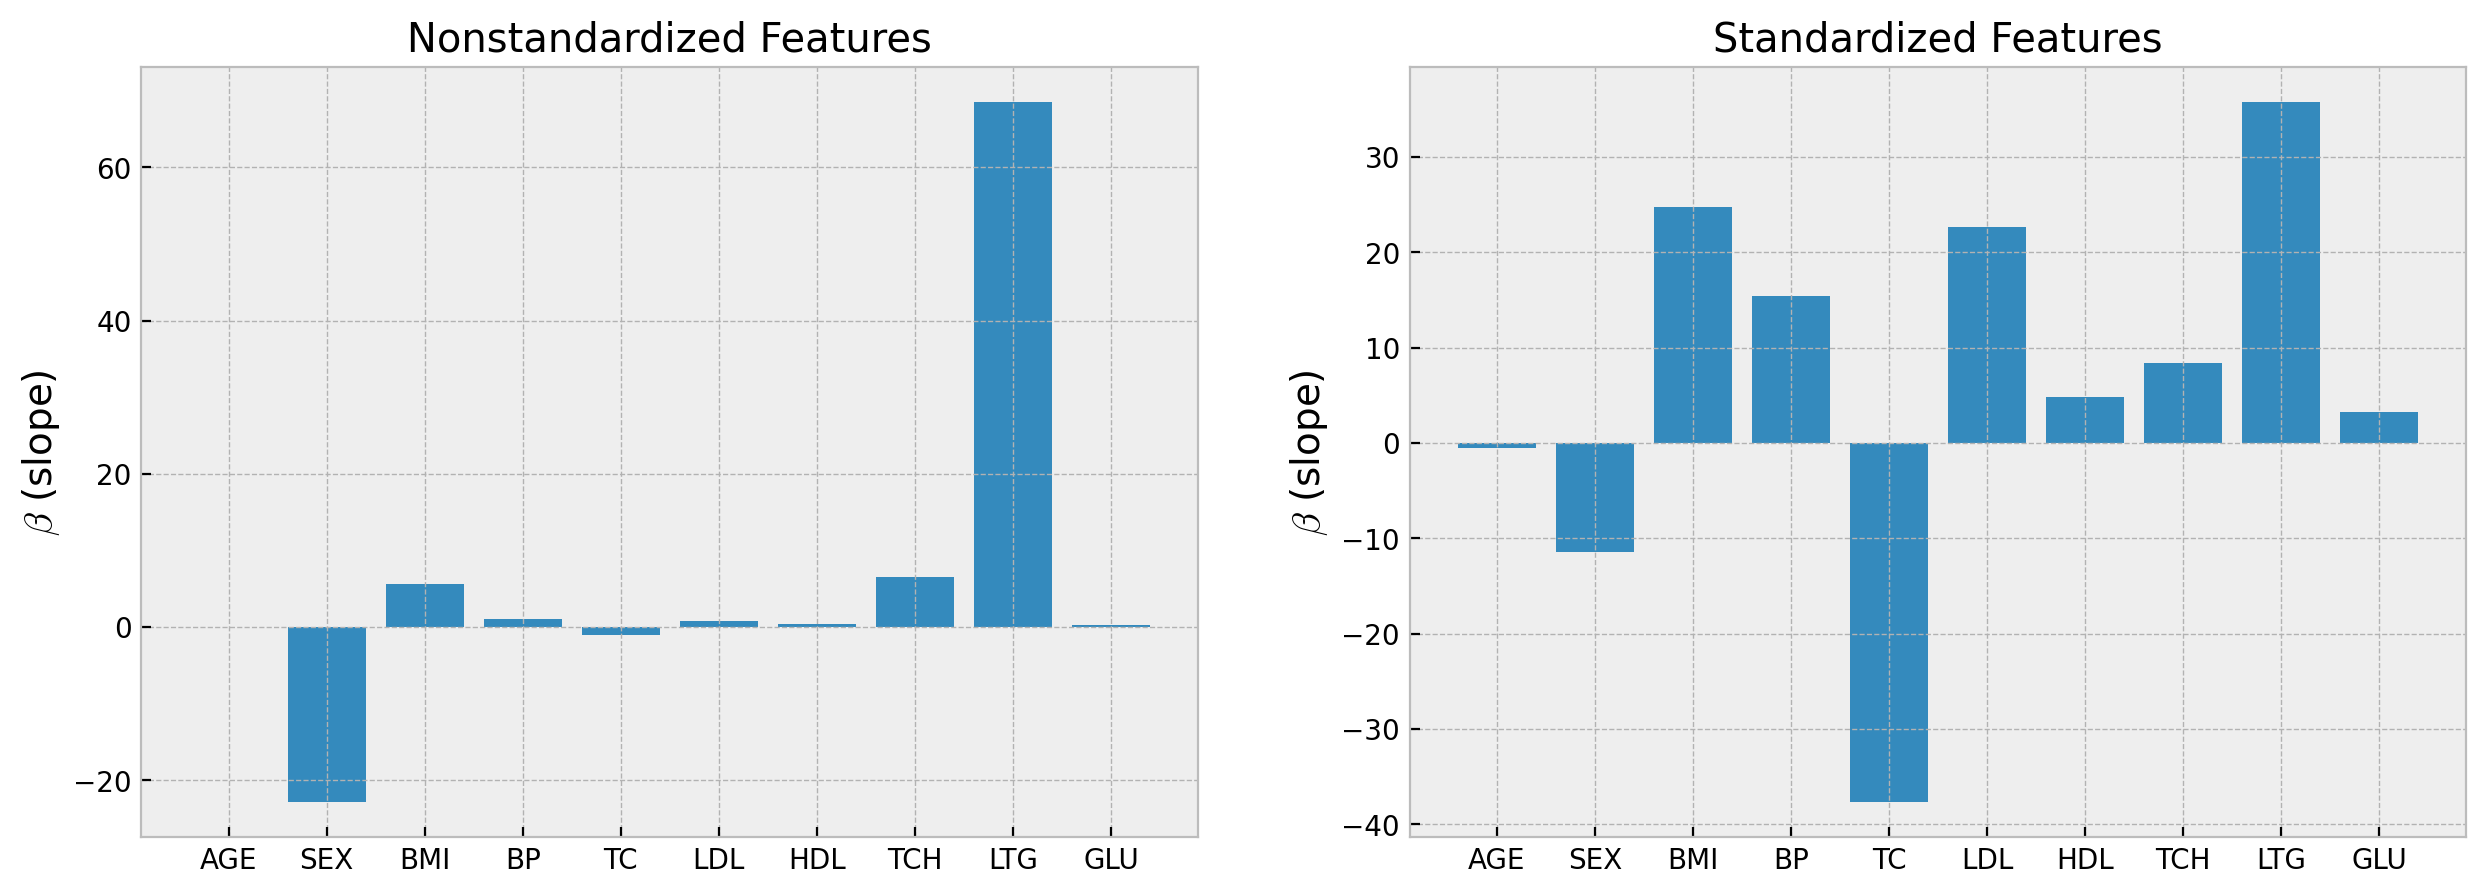

In [52]:
# non-standardized vs. standardized features
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.bar(range(len(model.coef_)), model.coef_)
plt.xticks(range(len(model.coef_)), features)
plt.ylabel(r'$\beta$ (slope)')
plt.title('Nonstandardized Features')
plt.subplot(122)
plt.bar(range(len(smodel.coef_)), smodel.coef_)
plt.xticks(range(len(smodel.coef_)), features)
plt.ylabel(r'$\beta$ (slope)')
plt.title('Standardized Features');

Imagine you measure these features in a new patient, and you would like to get an idea of whether or not you should treat them for diabetes.

Use your model to predict diabetes progression in the new patient.

In [53]:
age = 50
sex = 1
bmi = 20
map_ = 125
tc = 150
ldl = 100
hdl = 55
tch = 6.5
ltg = 4
glu = 120

# features MUST be 1xN array (i.e., a row vector with one column per feature)
Xnew = np.array([age, sex, bmi, map_, tc, ldl, hdl, tch, ltg, glu]).reshape((1,-1))
Xnew

array([[ 50. ,   1. ,  20. , 125. , 150. , 100. ,  55. ,   6.5,   4. ,
        120. ]])

In [54]:
# new patient diabetes progression prediction from non-standardized model
model.predict(Xnew)

array([174.03769412])

In [55]:
# new patient diabetes progression prediction from model with standardized features
smodel.predict(Xnew)

array([3.76993915])

Why do these two models have such disparate predictions?

!!! For the model trained on standardized features, you must first transform any input data in exactly the same way as you did the data the model was trained on (i.e., fit to).

Recall, this was how we transformed the data used to train the standardized model...

In [56]:
Xs = (X - X.mean(axis=0)) / X.std(axis=0)

How would you transform the data for the new patient so that it can be given to the standardized model?

In [57]:
# Xnews = ...

# model.predict(Xnew), smodel.predict(Xnews)

# Exercise

Correctly predict the diabetes progression for the new patient (`Xnew`) using the model with standardized features (`smodel`).

# Exercise key

Correctly predict the diabetes progression for the new patient (`Xnew`) using the model with standardized features (`smodel`).

In [58]:
Xnews = (Xnew - X.mean(axis=0)) / X.std(axis=0)

model.predict(Xnew), smodel.predict(Xnews)

(array([174.03769412]), array([174.03769412]))

Standardizing the target variable $y$ is typically unessecary, but can in some cases help numerical optimization algorithms (especialy in cases where target values are extreme). However, the results must be inverse transformed to be interperable in the original units, so I would only bother to do this if you really need to.

# Exercise

1. For one of the above models, create a scatter plot of the measured vs. predicted diabetes progression in all 442 patients. Does it matter which model you choose?
2. Compute the residuals between the measured vs. predicted diabetes progression.

In [59]:
# y_prediction = ...
# plt.plot(y, y_prediction, 'o')
# plt.xlabel('Measured Diabetes Progression')
# plt.ylabel('Predicted Diabetes Progression')
# plt.title('Multiple Linear Regression Model');

In [60]:
# residuals = ...

# Exercise key

1. For one of the above models, create a scatter plot of the measured vs. predicted diabetes progression in all 442 patients. Does it matter which model you choose?
2. Compute the residuals between the measured vs. predicted diabetes progression.

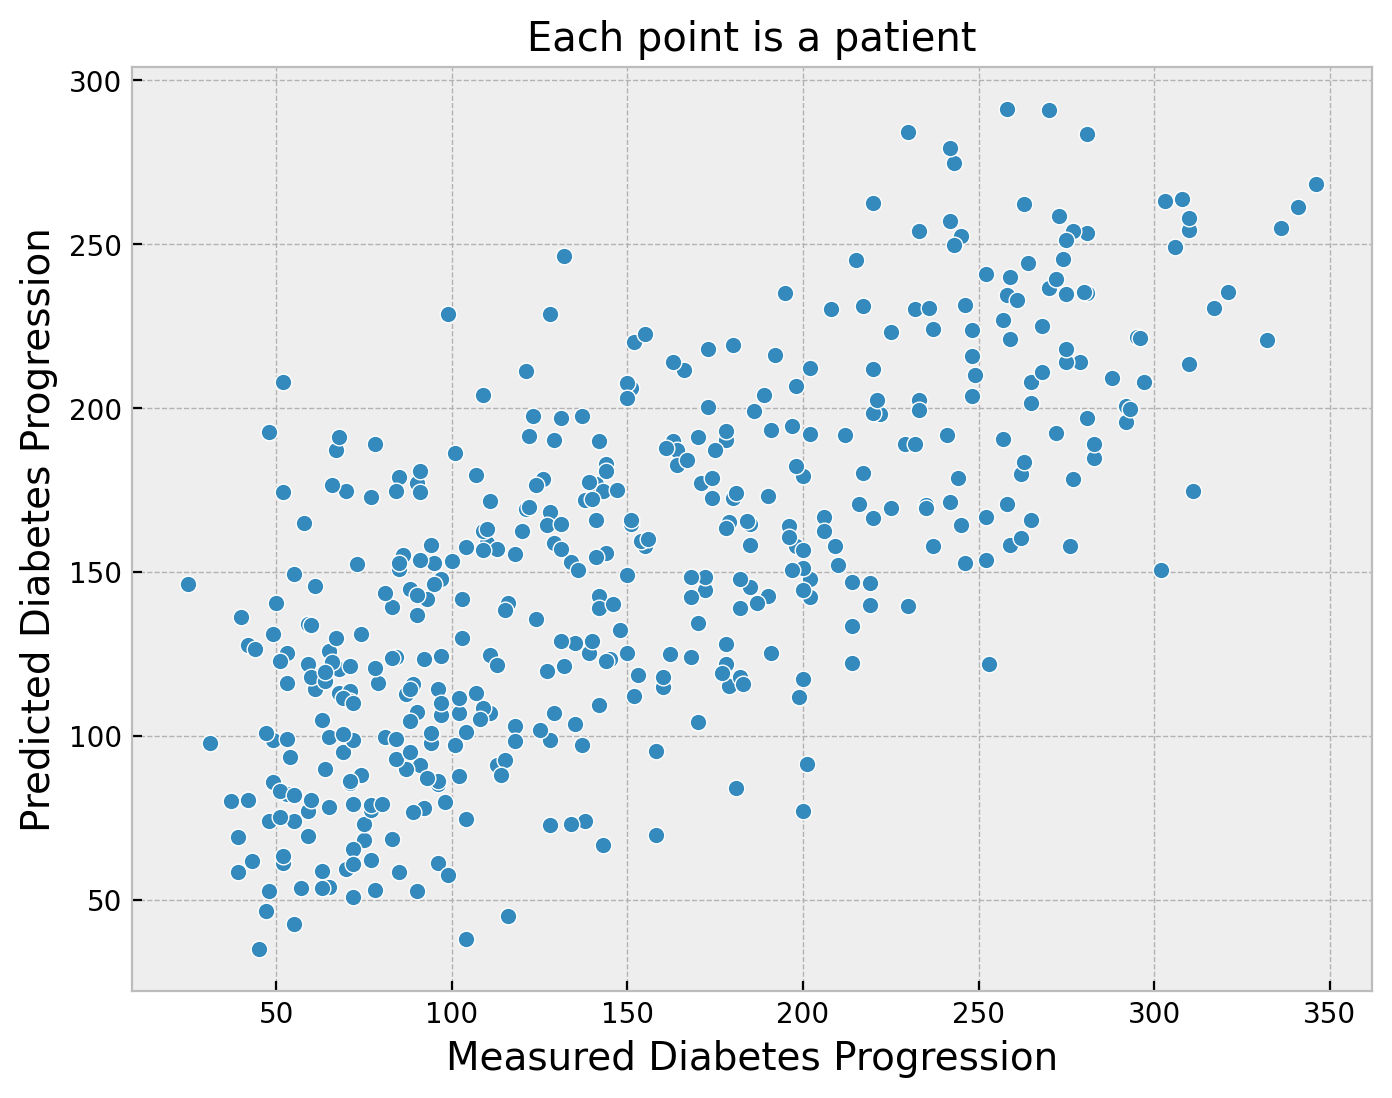

In [61]:
y_prediction = smodel.predict(Xs)
plt.plot(y, y_prediction, 'o')
plt.xlabel('Measured Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('Each point is a patient');

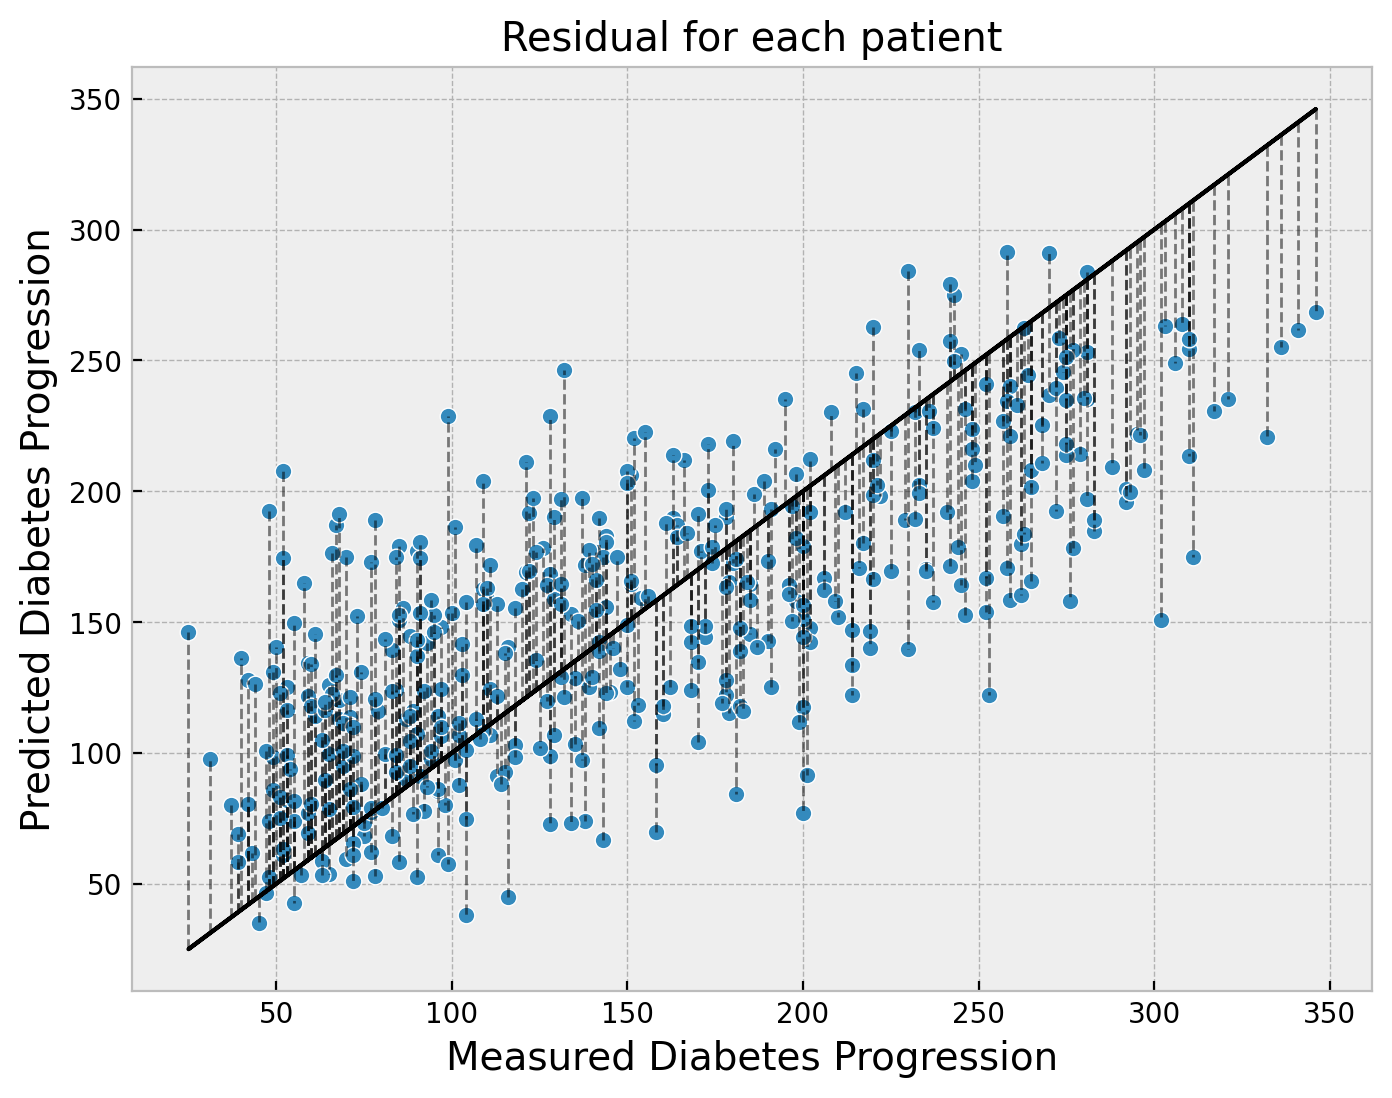

In [62]:
residuals = y_prediction - y

plt.plot(y, y_prediction, 'o')
plt.plot(y, y, 'k-')
y_col = y.reshape([-1,1])
plt.plot(np.hstack([y_col, y_col]).T, np.hstack([y_col, y_prediction.reshape([-1,1])]).T, 'k--', lw=1, alpha=0.5)
plt.xlabel('Measured Diabetes Progression')
plt.ylabel('Predicted Diabetes Progression')
plt.title('Residual for each patient');

### Mean Squared Error (MSE)

$MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$

In [63]:
mse = np.mean(residuals**2)

mse

2859.69634758675

### $R^2 = \frac{\text{variance explained by model}}{\text{total variance}} = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$

![](images/R2.png)

*left*: $R^2 = 0.15$, *right*: $R^2 = 0.85$

In [64]:
R2 = 1 - np.sum(residuals**2) / np.sum((y - y.mean())**2)

R2

0.5177484222203499

In [65]:
model.score(X, y)

0.5177484222203498

# Question?

How could you get confidence intervals for the slope parameter of each feature in the model?

`statsmodels` is another package that returns confidence intervals for linear regression parameters.

However, it's important that you understand how to obtain these yourself in a manner that is generally applicaple to any sort of model.

# Exercise

1. Generate a linear model for predicting diabetes progression based on the two standardized features that have the largest impact.
2. Compute the $R^2$ score for the model's fit and compare to the model with all 10 features. Which is better?
3. Use the model to predict the diabetes progression in the new patient from above.
4. Make a bar plot of the model's slope parameters for the selected features.

In [ ]:
# prepare the data
features = [...]
X = ...  # 2 features
Xs = ...  # standardized
y = ...  # target

# create the linear model
model = ...

# fit the model to the data
...

# R^2 score (compare to model with all 10 features having R^2 ~ -.518)
R2 = ...

# predict diabetes progression in a new patient
Xnew = ...
ynew_prediction = ...

# plot the model's slope parameters for each feature
plt.bar(...)
plt.xticks(range(len(model.coef_)), features)
plt.ylabel('Slope');